## Introduction

A time series is any metric that is measured over regular time intervals. For example, weather data, stock prices, industry forecasts, etc.

In business forecasting it is quite common to deal with seasonal time series. The seasonal component may interact with the level in an additive or multiplicative way. This means that in an additive way, the amplitude of the seasonality remains constant, while in the multiplicative way it changes as the level does. Seasonal amplitude reduces if the level is decreasing. Refer to the slides on Blackboard for examples of multiplicative and additive models.

Each data point **(Yt)** at time **t** in a Time Series can be expressed as either a sum or a product of 3 components, namely:
 - Seasonality (St)
 - Trend (Tt) 
 - Error (et), also known as "white noise"
 
For additive time series the formula used is Y<sub>t</sub> = S<sub>t</sub> + T<sub>t</sub> + ϵ<sub>t</sub>
 
For multiplicative time series the formula used is Y<sub>t</sub> = S<sub>t</sub> x T<sub>t</sub> x ϵ<sub>t</sub>

## Time series object

In order to work with a time series in R, you have to place it into a time-series object. This is an R structure that contains the observations, the starting and ending time of the series, and information about its periodicity e.g. monthly, quarterly, annual data.

Once data are in a time-series object, we can use numerous functions to manipulate, model, and plot the data.

A vector of numbers, or a column in a data frame can be saved as a time-series object using the `ts()` function.

There are several arguments in the `ts()` function including:
 - `start` - which represents the time of the first observation. Either a single number or a vector of two integers.
 - `end` - the time of the last observation, specified in the same way as start.
 - `frequency` - the number of observations per unit of time. It is used when the series is sampled an integral number of times in each unit time interval. For example, we could use a value of **7** for frequency when the data are sampled **daily**, and the natural time period is a week, **4** when there are 4 quarters in the data, or **12** when the data are sampled **monthly** and the natural time period is a year. 
 
Here's an example of a simple time serives object.

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2003,18,33,41,7,34,35,24,25,24,21,25,20
2004,22,31,40,29,25,21,22,54,31,25,26,35


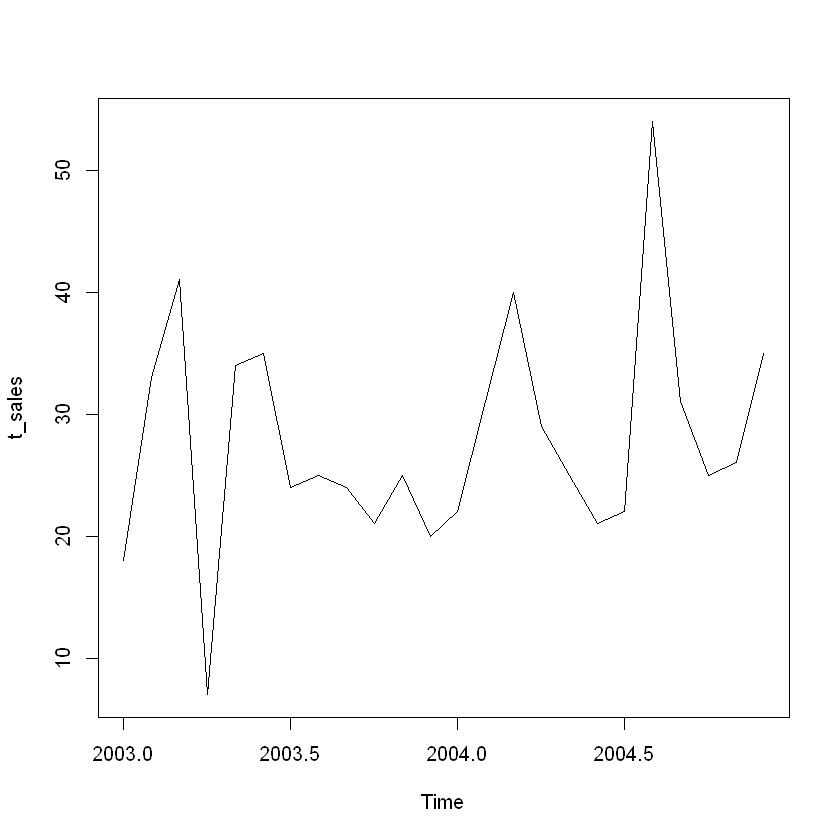

In [1]:
# Simple example of a time series object
# consisting of monthly sales data over 2 years

sales <- c(18, 33, 41, 7, 34, 35, 24, 25, 24, 21, 25, 20,
           22, 31, 40, 29, 25, 21, 22, 54, 31, 25, 26, 35)

# Frequency refers to the number of observations
# per unit of time
# In this example, each time unit is a year
# and we use frequency = 12 to represent monthly data
t_sales <- ts(sales, start=c(2003, 1), frequency=12)
t_sales

plot(t_sales)

## Time series functions
We can use functions to determine various properties of the time series object.

In [2]:
start(t_sales)
end(t_sales)
frequency(t_sales)

[1] 2003    1

[1] 2004   12

[1] 12

We can display some inforamtion on the Nile time series.

In [3]:
class(Nile)

[1] "ts"

In [4]:
start(Nile)

[1] 1871    1

In [5]:
end(Nile)

[1] 1970    1

In [6]:
frequency(Nile)

[1] 1

In [7]:
summary(Nile)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  456.0   798.5   893.5   919.4  1032.5  1370.0 

This information shows that the Nile is a time series object that contains data between 1871 to 1970. The frequency indicates the data is annualised. 

## First steps of time series
Describing a time series numerically and visually should be the first step before attempting to build complex models. The first step when investigating a time series is to plot it.

Consider the `Nile` time series. It records the annual flow of the river Nile at Ashwan from 1871–1970. 
Time series typically have a significant irregular or error component. In order to remove patterns in the data, we can plot a smoothed curve that damps down these fluctuations through simple moving averages. 
For example, each data point can be replaced with the mean of that observation and one observation before and after it. This is called a `centered moving average`.

Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



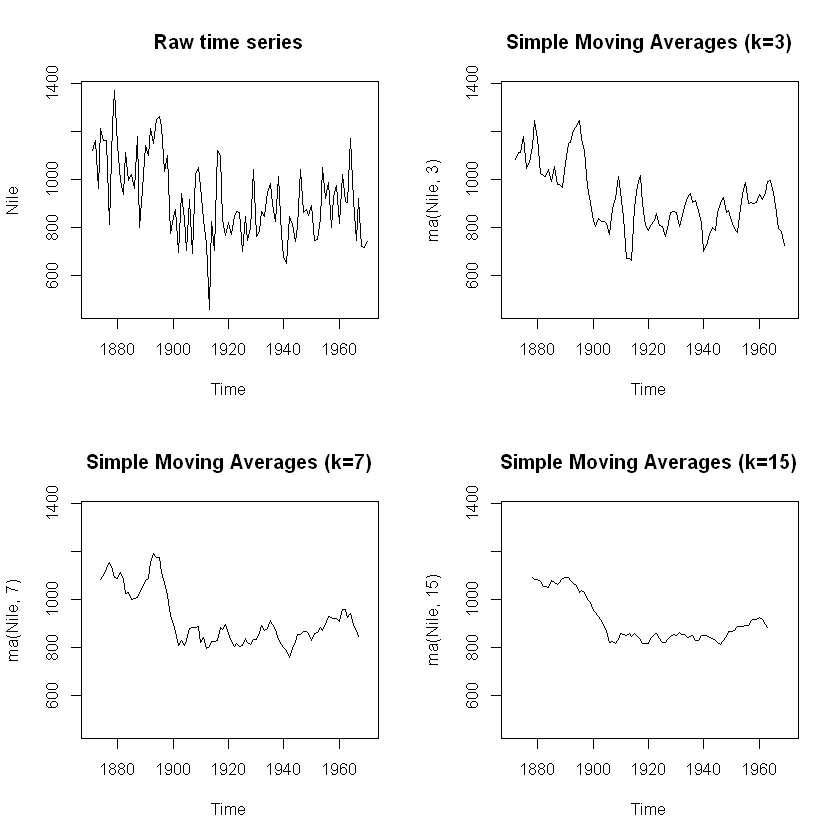

In [8]:
#install.packages("forecast")
library(forecast)

opar <- par(no.readonly=TRUE)
par(mfrow=c(2,2))

ylim <- c(min(Nile), max(Nile))
plot(Nile, main="Raw time series")
# ma() function used to smooth the Nile time series
plot(ma(Nile, 3), main="Simple Moving Averages (k=3)", ylim=ylim)
plot(ma(Nile, 7), main="Simple Moving Averages (k=7)", ylim=ylim)
plot(ma(Nile, 15), main="Simple Moving Averages (k=15)", ylim=ylim)
par(opar)
# As k increases, plot becomes increasingly smooth

## Stationarity

In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time. It does not mean that the series does not change over time, just that the way it changes does not itself change over time. 

The algebraic equivalent is a linear function, perhaps, and not a constant one; the value of a linear function changes as 𝒙 grows, but the way it changes remains constant — it has a constant slope; one value that captures that rate of change.

A time series is said to be stationary if it holds the following conditions true.
 - The mean value of time-series is constant over time, which implies, the trend component is nullified.
 - The variance does not increase over time.
 - Seasonality effect is minimal.<br>
 
This means it is devoid of trend or seasonal patterns, which makes it looks like a random white noise irrespective of the observed time interval.


## Why is stationarity important?
The stationary processes are easier to analyse. Stationary processes are a sub-class of a wider family of possible models of reality. This sub-class is much easier to model and investigate. Such processes should be possible to predict, as the way they change is predictable.

## How to determine if a time series is stationary

We can apply the `adf.test()` function to apply the **Augmented Dickey-Fuller Test**. 

In [9]:
# Test if a time series is stationary
library(tseries)
# p-value < 0.05 indicates the TS is stationary
# In this eample, Nile data is not stationary
adf.test(Nile)

Warning message:
"package 'tseries' was built under R version 3.6.3"



	Augmented Dickey-Fuller Test

data:  Nile
Dickey-Fuller = -3.3657, Lag order = 4, p-value = 0.0642
alternative hypothesis: stationary


The `adf.test()` function shows that the Nile dataset is currently not recognised at stationary.

Stationary testing and converting a series into a stationary series are the most critical processes in time series modelling. 

Let’s now consider an example to show you what a time series looks like.

## time series example using the Air Passengers dataset

In this example I'm using the `AirPassengers` data, which is a monthly time series in thousands. You can view more information on this time series by looking at the help on this.

Lets allocate the time series object to a variable first.

In [10]:
air_passengers <- ts(AirPassengers)

We can view the `type` of this object using the `class()` function.

In [11]:
class(air_passengers)

[1] "ts"

The AirPassenger dataset in R provides monthly totals of a US airline passengers, from 1949 to 1960. This dataset is already of a time series class therefore no further class or date manipulation is required.

We can lok at some information on the time series object though.

In [12]:
cat("Start of air passengers : ", start(air_passengers), "\n")
cat("End of air passengers : ", end(air_passengers), "\n")
cat("Frequency of air passengers : ", frequency(air_passengers), "\n")
print(summary(air_passengers))


Start of air passengers :  1 1 
End of air passengers :  144 1 
Frequency of air passengers :  1 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 


The frequency value does not look like it is configured correctly. This appears to be in a yearly cycle. It should be in a monthly cycle.

In [13]:
## Exploratory data analysis
frequency(air_passengers)
cycle(air_passengers)

[1] 1

A Time Series:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

I can convert the time series object so that it is in the correct format using this code.

In [14]:
# Correct the time series structure
# so that it is in a monthly cycle starting at Jan 1949
air_passengers <- ts(AirPassengers, start=c(1949, 1), frequency=12)

In [15]:
cycle(air_passengers)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,1,2,3,4,5,6,7,8,9,10,11,12
1950,1,2,3,4,5,6,7,8,9,10,11,12
1951,1,2,3,4,5,6,7,8,9,10,11,12
1952,1,2,3,4,5,6,7,8,9,10,11,12
1953,1,2,3,4,5,6,7,8,9,10,11,12
1954,1,2,3,4,5,6,7,8,9,10,11,12
1955,1,2,3,4,5,6,7,8,9,10,11,12
1956,1,2,3,4,5,6,7,8,9,10,11,12
1957,1,2,3,4,5,6,7,8,9,10,11,12
1958,1,2,3,4,5,6,7,8,9,10,11,12


And checking the time series `frequency()` shows that the time series object is correctly configured.

In [16]:
frequency(air_passengers)

[1] 12

### Check for missing values

I can check the time series for missing values using the libraries we've used throughout the module. This can also be applied before the time series object is converted from a data frame.

In [17]:
# View the records with NA
na_records <- air_passengers[!complete.cases(air_passengers)]
sum(na_records)

[1] 0

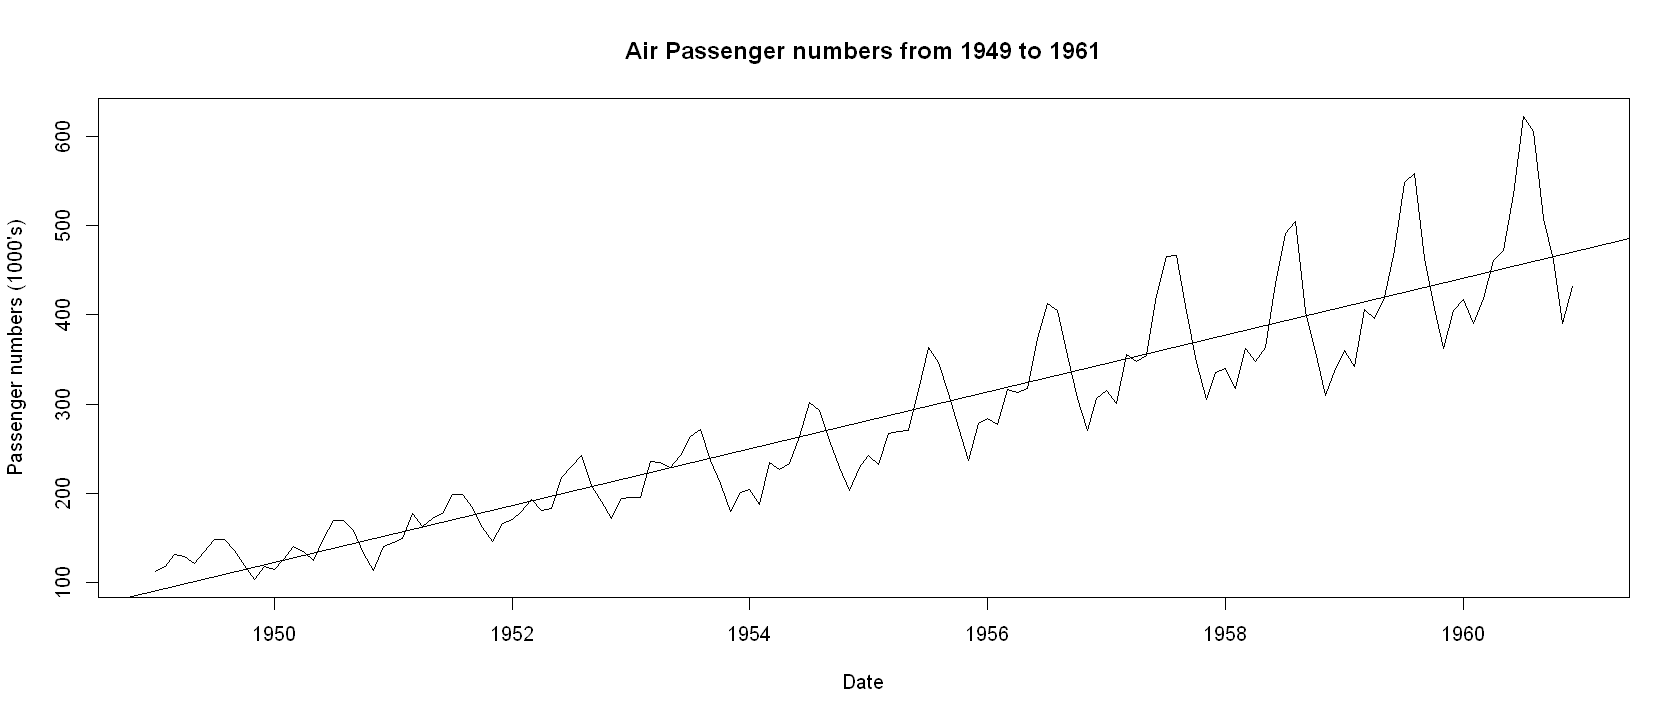

In [18]:
# Use for jupyter notebook only
options(repr.plot.width=14, repr.plot.height=6)

# Show data using a plot() function
plot(air_passengers,
     xlab="Date", 
     ylab = "Passenger numbers (1000's)",
     main="Air Passenger numbers from 1949 to 1961")
# Add a straight line shwing the linear relationship
# between passenger numbers and time
abline(reg=lm(air_passengers~time(air_passengers)))

We can examine the yearly trend within the data using the `aggregate()` function. 

The chart demonstrates that the year on year trend is that passengers have been increasing.

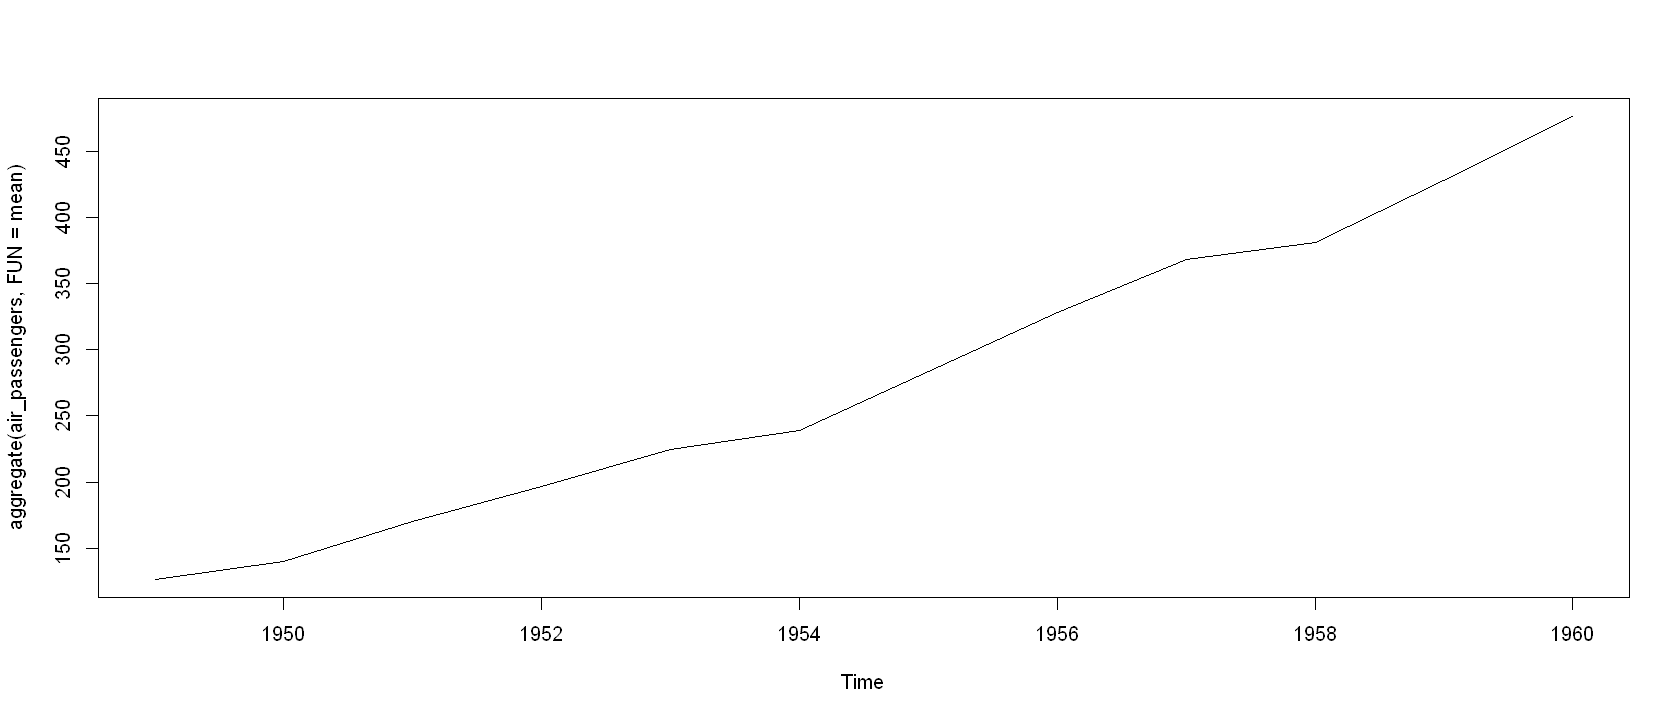

In [19]:
plot(aggregate(air_passengers,FUN=mean))

And we can examine any seasonal effects within the data using a `boxplot()`.

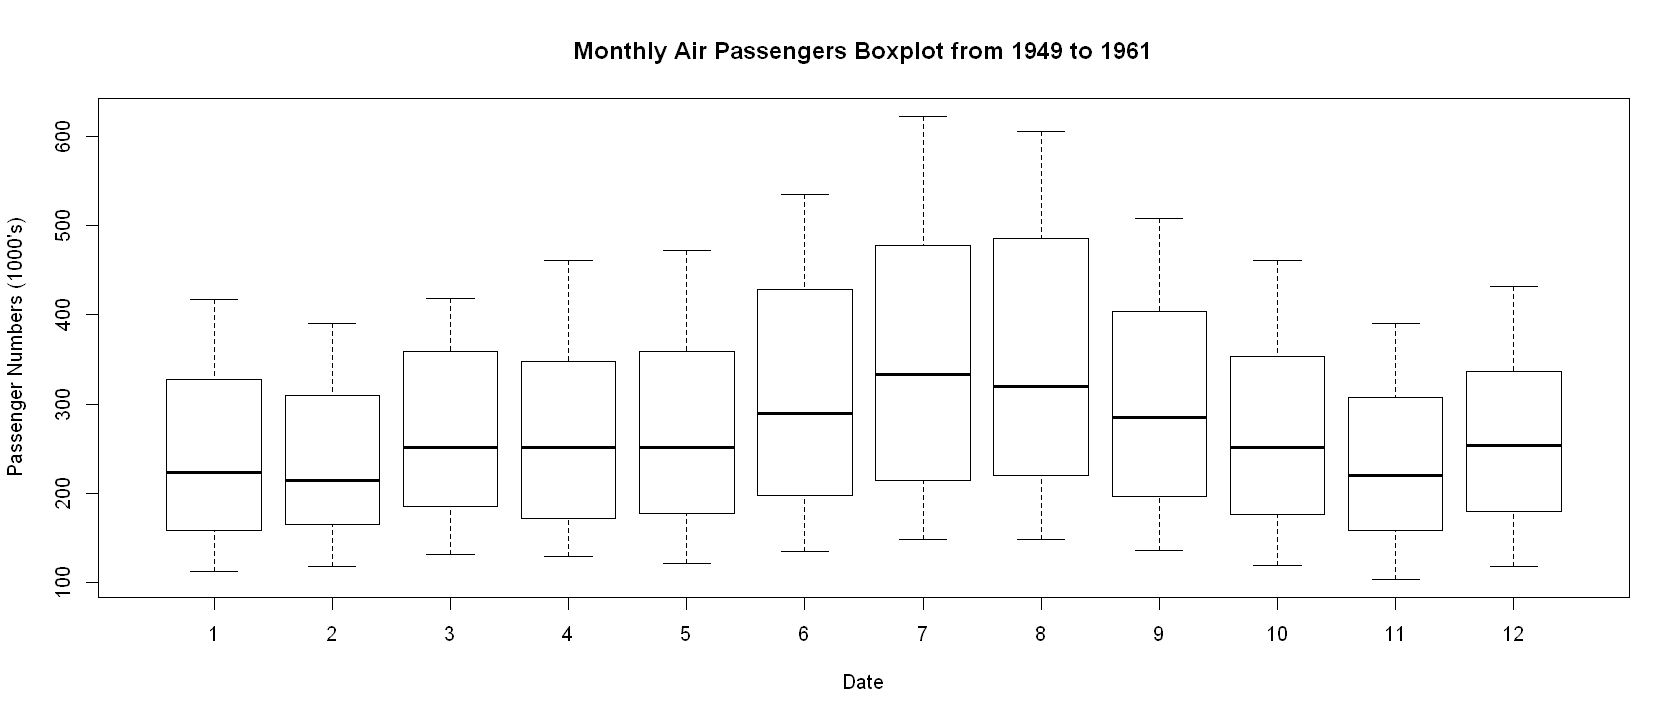

In [20]:
boxplot(air_passengers ~ cycle(air_passengers),
        xlab="Date", 
        ylab = "Passenger Numbers (1000's)" ,
        main ="Monthly Air Passengers Boxplot from 1949 to 1961")

In the boxplot there are more passengers travelling in months 6 to 9 with higher means and higher variances than the other months. This indicates seasonality with a apparent cycle of 12 months. The rationale for this could be that more people take holidays and fly during the summer months in the USA.

## Multiplicative or additive model?

It’s important to understand what the difference between a multiplicative time series and an additive one before we go any further.

There are three components to a time series:<br>

 - trend how data changes overall<br>
 - seasonality how things change within a given period e.g. a year, month, week, day<br>
 - error/residual/irregular activity not explained by the trend or the seasonal value<br>

How these three components interact determines the difference between a multiplicative and an additive time series.

In **multiplicative time series**, the components multiply together to make the time series. If you have an increasing trend, the amplitude of seasonal activity increases. Everything becomes more exaggerated. This is common when you’re looking at web traffic.

In **additive time series**, the components add together to make the time series. If you have an increasing trend, you still see roughly the same size peaks and troughs throughout the time series. This is often seen in indexed time series where the absolute value is growing but changes stay relative.

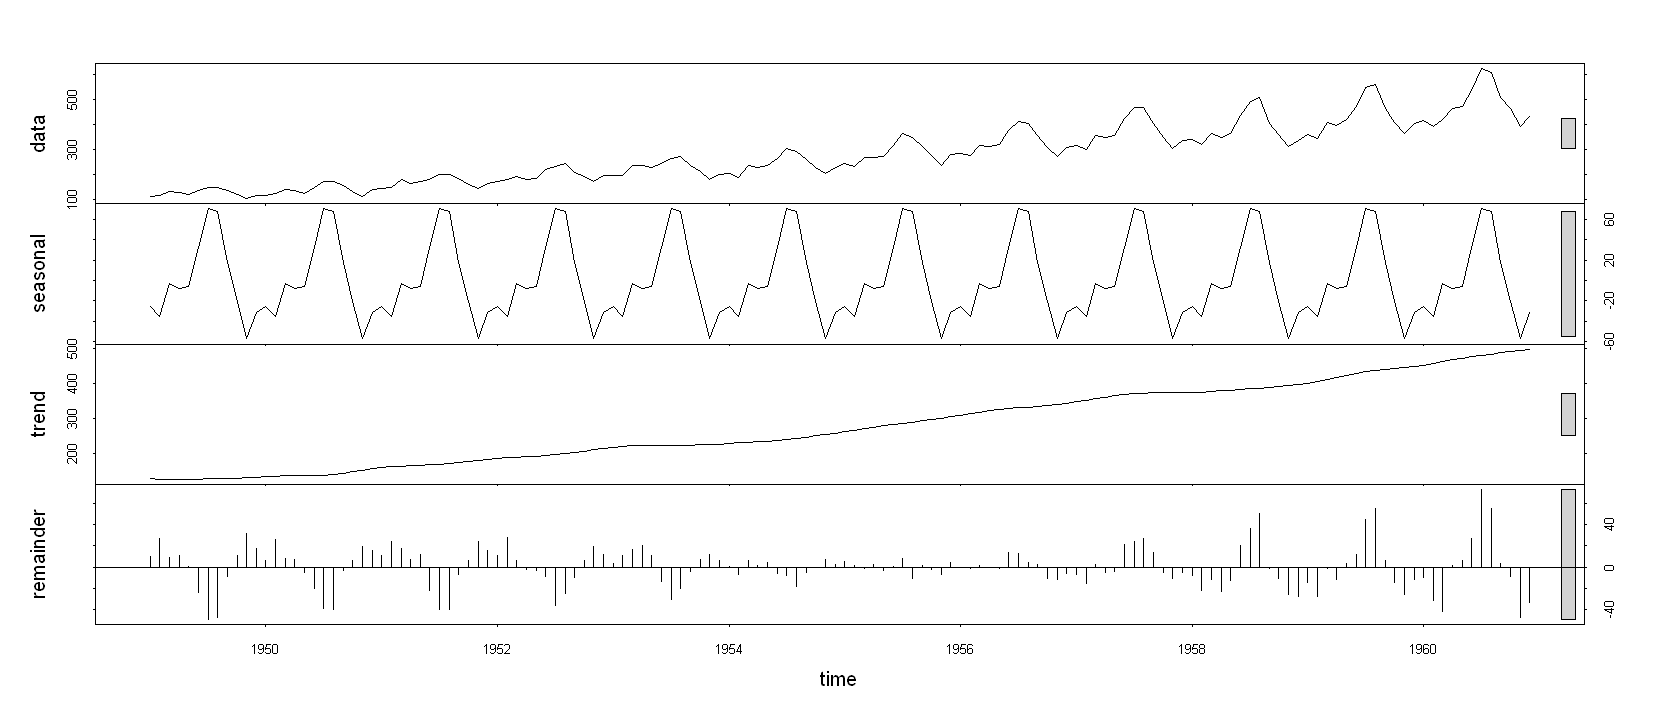

In [21]:
seasonal_decomposition <- stl(air_passengers, s.window="period")
plot(seasonal_decomposition)

The `data` chart shows that the data appears to be multiplicative time series as the passenger numbers increase, it appears so does the pattern of seasonality. 

In the earlier `plot()` function we could see that there is a trend component within the air passenger data.

There appears to be a seasonal component which has a cycle less than 12 months.

The variance in the data keeps on increasing with time.

These points indicate that the data is multplicative. They also indicate that the data contains both trend and seasonal elements.

We can see this from the `boxplot()` and `aggregate` charts (above).

## Test the seasonality of the time series

A stationary time series has conditions where the mean, variance and covariance are not functions of time. It is one whose properties do not depend on the time at which the series is observed. Thus, time series with **trends**, or with **seasonality**, are **not stationary**. Both the trend and seasonality will affect the value of the time series at different times. 

A white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time.

Some cases can be confusing — a time series with cyclic behaviour (but with no trend or seasonality) is stationary. The cycles are not of a fixed length, so before we observe the series we cannot be sure where the peaks and troughs of the cycles will be.

In general, a stationary time series will have no predictable patterns in the long-term. Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance.

The time series must be stationary before it can be used to fit an arima model. We will use two methods to test the stationarity of the time series object.

#### Method 1: Test stationarity of the time series (ADF)

In order to test the stationarity of the time series, let’s run the **Augmented Dickey-Fuller** Test using the `adf.test()` function from the `tseries` package.

First I'll define the hypothesis test:

The null hypothesis H<sub>0</sub> : the time series is non stationary<br>
The alternative hypothesis H<sub>A</sub> : the time series is stationary

The `adf.test()` function uses 

In [22]:
library(tseries)
suggested_k <- trunc((length(air_passengers)-1)^(1/3))
suggested_k

[1] 5

In [23]:
adf.test(air_passengers, alternative = "stationary")

Warning message in adf.test(air_passengers, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  air_passengers
Dickey-Fuller = -7.3186, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


The value of `k` in the `adf.test()` function represents the lag order to calculate the test statistic. The default k value is computed as `trunc((length(x)-1)^(1/3))`  which corresponds to the suggested upper bound on the rate at which the number of lags, k, should be made to grow with the sample size for the general ARMA(p,q) setup

The output for `k` (above) suggests that `k=5` should be used. This essentially is examining the previous 5 months within the `air_passengers` dataset which isnt accounting for the entire year of each cycle of the data. A value of `k=12` is more reasonable.

In this code I've modified the value of k to 12 to account for the yearly cycle within the dataset.

The p-value is less than 5% (p <0.05), and we have strong evidence against the null hypothesis, so we **reject the null hypothesis** and choose the alternative hypothesis that the time series is stationary.

But this isn’t correct. We’ve run this test using the **default** lag order of 5. Since this is monthly data, we need to expand the test’s lag visibility to **12** so it can see the seasonality. 

Now I'll re-run the test with the `k` value set to 12 to account for 

**Note:** if we had to **difference** the dataset, we would use the `ndiffs()` function including the number of lags to difference it by.

In [24]:
adf.test(air_passengers, alternative = "stationary", k = 12)


	Augmented Dickey-Fuller Test

data:  air_passengers
Dickey-Fuller = -1.5094, Lag order = 12, p-value = 0.7807
alternative hypothesis: stationary


The p-value is now greater than 5% (p <0.78), and we have strong evidence to accept the null hypothesis, so we can assume that the time series is not stationary.

#### Method 2 : Test stationarity of the time series (Autocorrelation)

Another way to test for stationarity is to use autocorrelation. We can use the autocorrelation function `acf()` from the base stats R package. 

This function plots the correlation between a series and its lags ie previous observations with a 95% confidence interval in blue. If the autocorrelation crosses the dashed blue line, it means that specific lag is significantly correlated with the current series.

Autocorrelation refers to how correlated a time series is with its past values whereas the ACF is the plot used to see the correlation between the points, up to and including the lag unit. In ACF, the correlation coefficient is in the x-axis whereas the number of lags is shown in the y-axis.

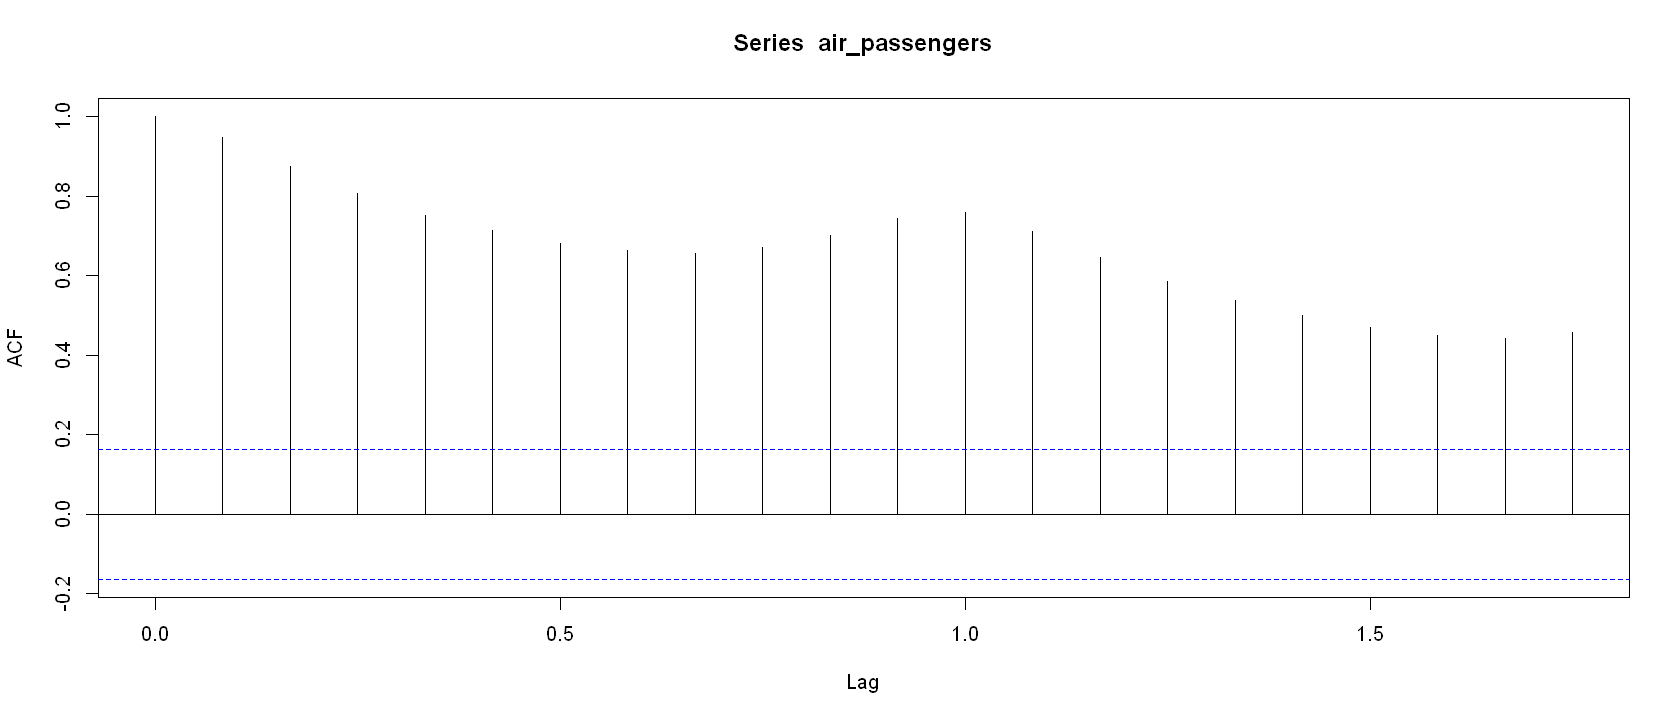

In [25]:
library(forecast)
acf(air_passengers)

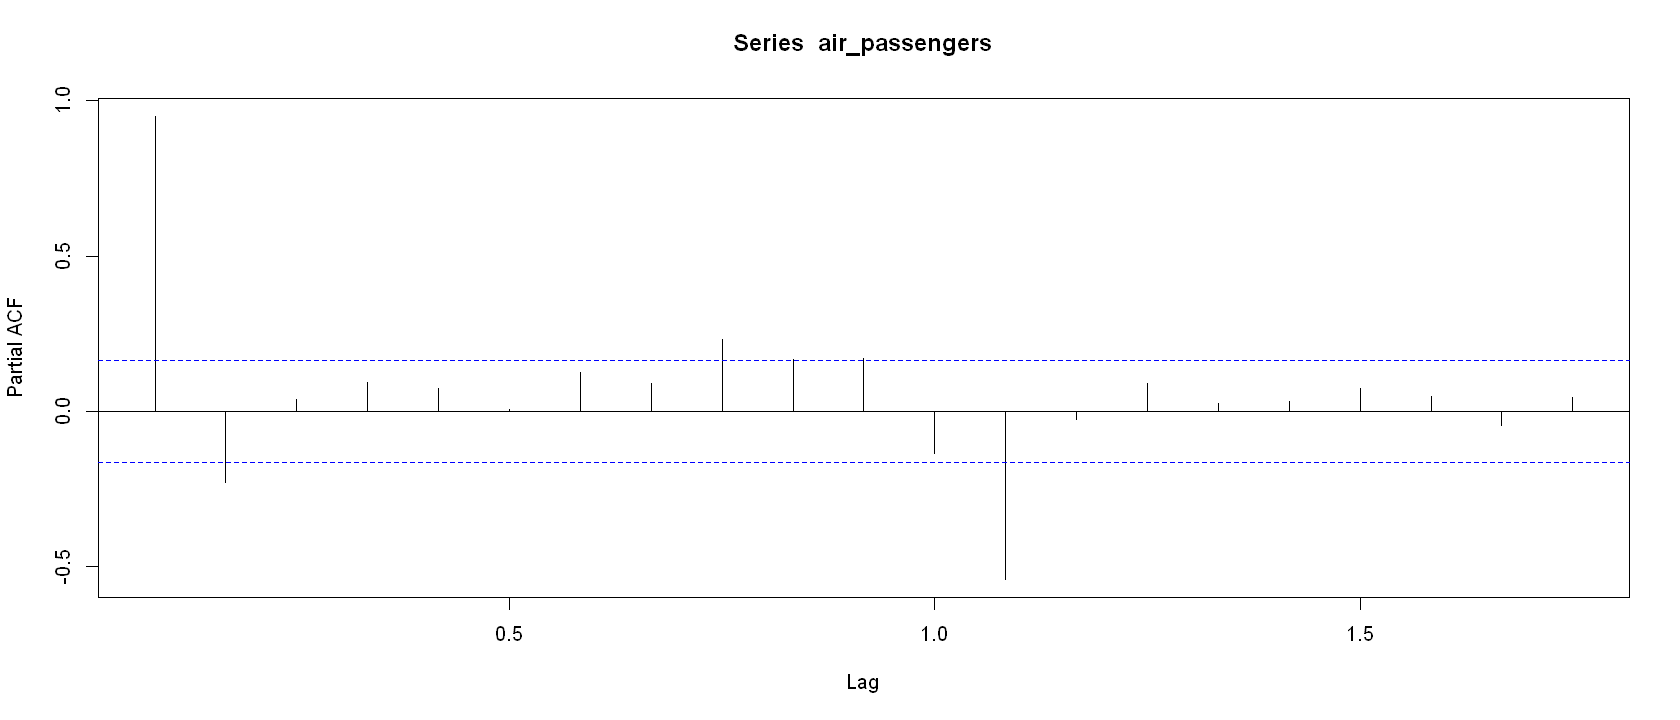

In [26]:
pacf(air_passengers)

From the ACF plot we can see that there's maximum peaks (lags) in the chart at the first and 12th month. This therefore indicates a positive relationship within the 12 month cycle. This indicates there's seasonality within the time series and it needs to be removed.

## Differencing

Transformations such as **logarithms** can help to stabilise the variance of a time series. Differencing can help stabilise the **mean** of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

### Seasonal differences
A seasonal difference is the difference between an observation and the previous observation from the same season. These are also called **lag-m differences**, as we subtract the observation after a lag of m periods.

To distinguish seasonal differences from ordinary differences, we sometimes refer to ordinary differences as **first differences**, meaning differences at lag 1.

When both seasonal and first differences are applied, it makes no difference which is done first as the result will be the same. However, if the data have a strong seasonal pattern, I recommend that seasonal differencing be done first, because the resulting series will sometimes be stationary and there will be no need for a further first difference. If first differencing is done first, there will still be seasonality present.

It is important that if differencing is used, the differences are interpretable. First differences are the change between one observation and the next. Seasonal differences are the change between one year to the next. Other lags are unlikely to make much interpretable sense and should be avoided.

As well as looking at the time plot of the data, the **ACF plot** is also useful for identifying non-stationary time series. 

**Note:** For a stationary time series, the ACF will drop to zero relatively quickly, while the ACF of non-stationary data decreases slowly. Also, for non-stationary data, the value of r<sub>1</sub> is often large and positive.

The ACF plot indicates the data is non-stationary.

We can use the `nsdiffs()` to examine whether seasonal differencing is required, and the `ndiffs()` function to indicate the number of differences that need to be carried out on the data. 

See https://medium.com/wwblog/stationarity-testing-using-the-augmented-dickey-fuller-test-8cf7f34f4844 

In [27]:
library(forecast)
nsdiffs(air_passengers)

[1] 1

No seasonal differences are suggested if FS<0.64, otherwise one seasonal difference is suggested.

In this example, the output suggests that 1 `log` is required to make the `air_passengers` data stationary. 

In [28]:
log_air_passengers <- log(air_passengers)

This should now make the data additive.

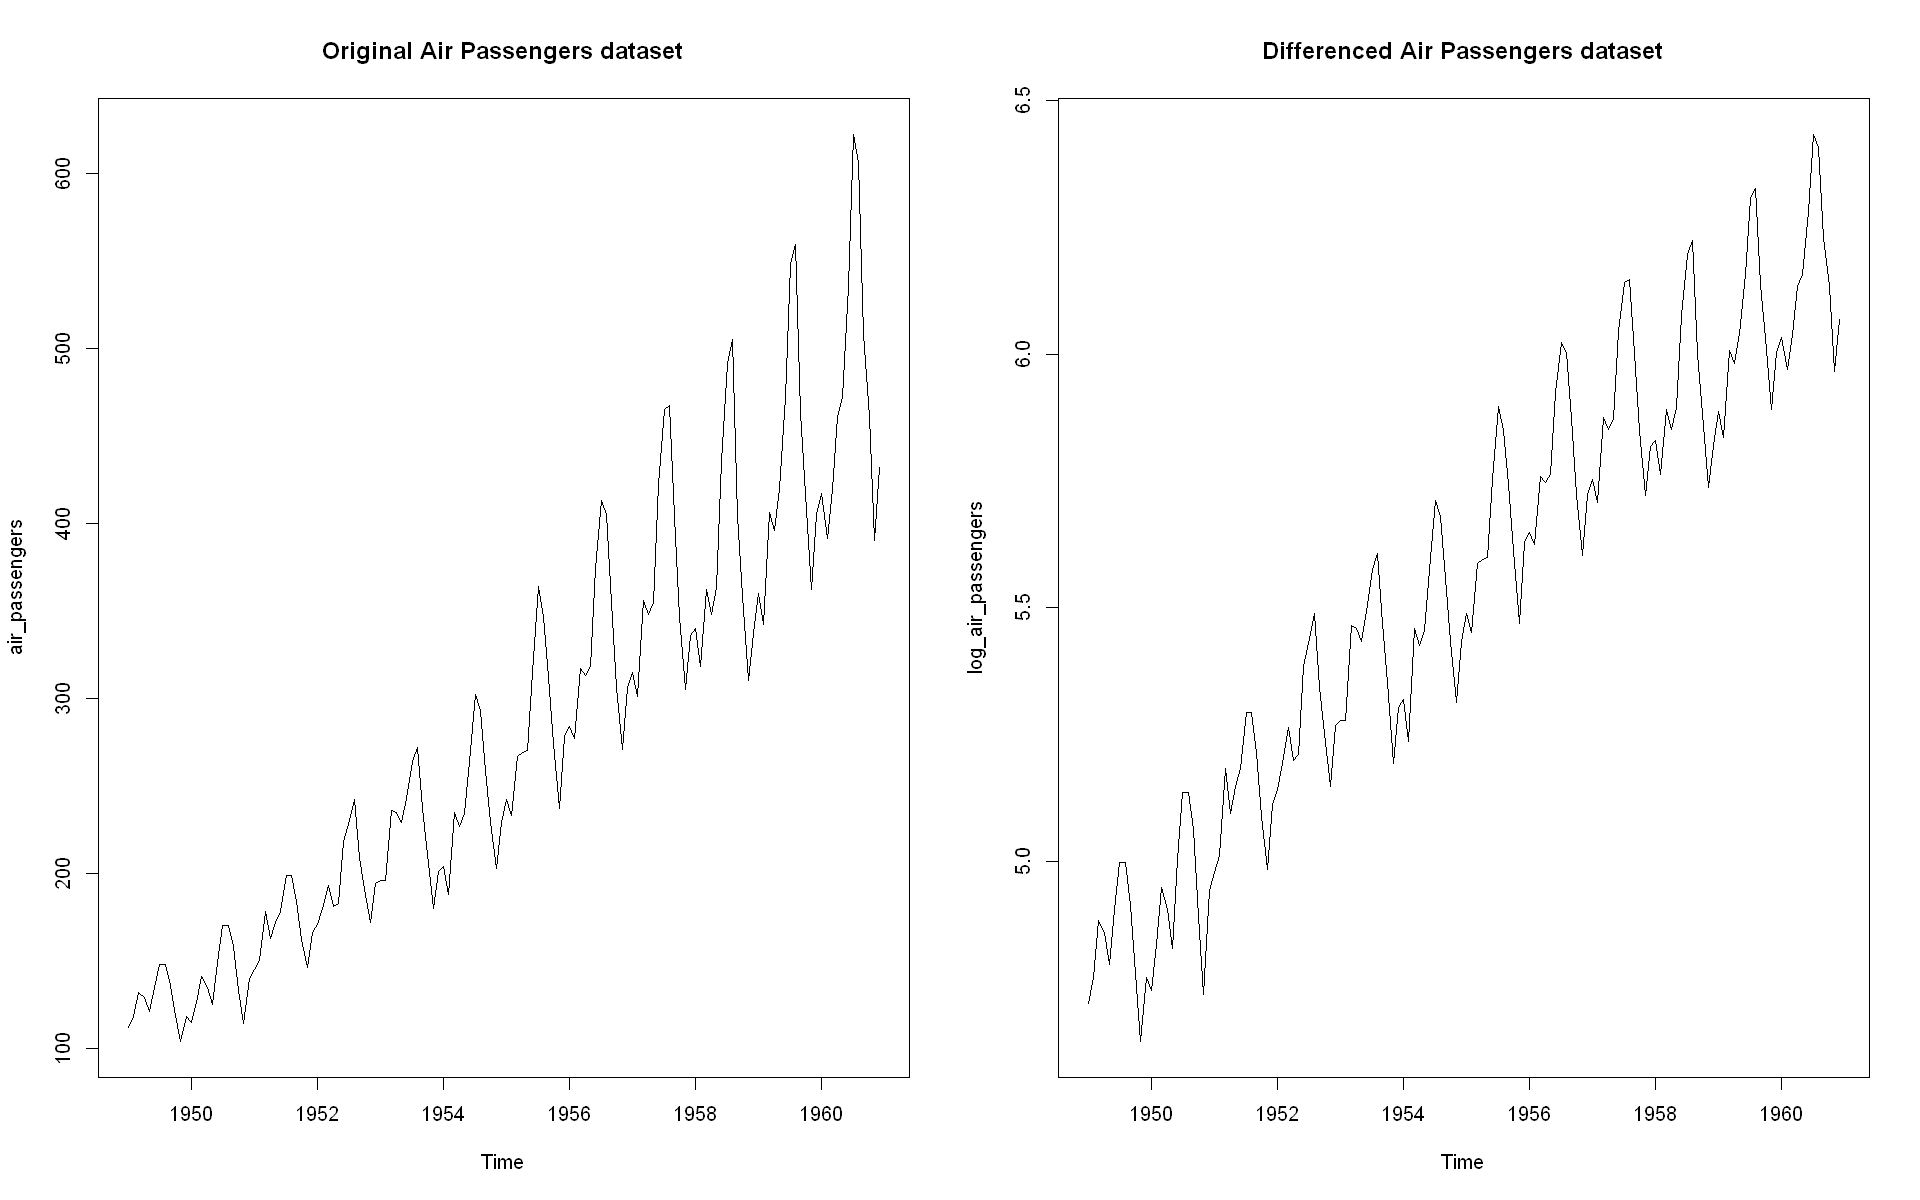

In [29]:
# Used for Jupyter notebook only
options(repr.plot.width=16, repr.plot.height=10)
# Show both side-by-side for comparison
opar <- par(no.readonly=TRUE)
par(mfrow=c(1,2))
plot(air_passengers, main = "Original Air Passengers dataset")
plot(log_air_passengers, main = "Differenced Air Passengers dataset")
par(opar)

There's unequal variances (sesonality) in the data. We can remove it using the `diff()` of the new additive data.

In [30]:
nsdiffs(log_air_passengers)

[1] 1

In [31]:
diff_air_passengers <- diff(log_air_passengers, lag = 12, differences = 2)

In [32]:
# Note these are the same
# diff(x, differences = 2)
# and diff(diff(x))
diff_air_passengers <- diff(log_air_passengers, lag = 12, differences = 2)

Lets see what that has done to the data.

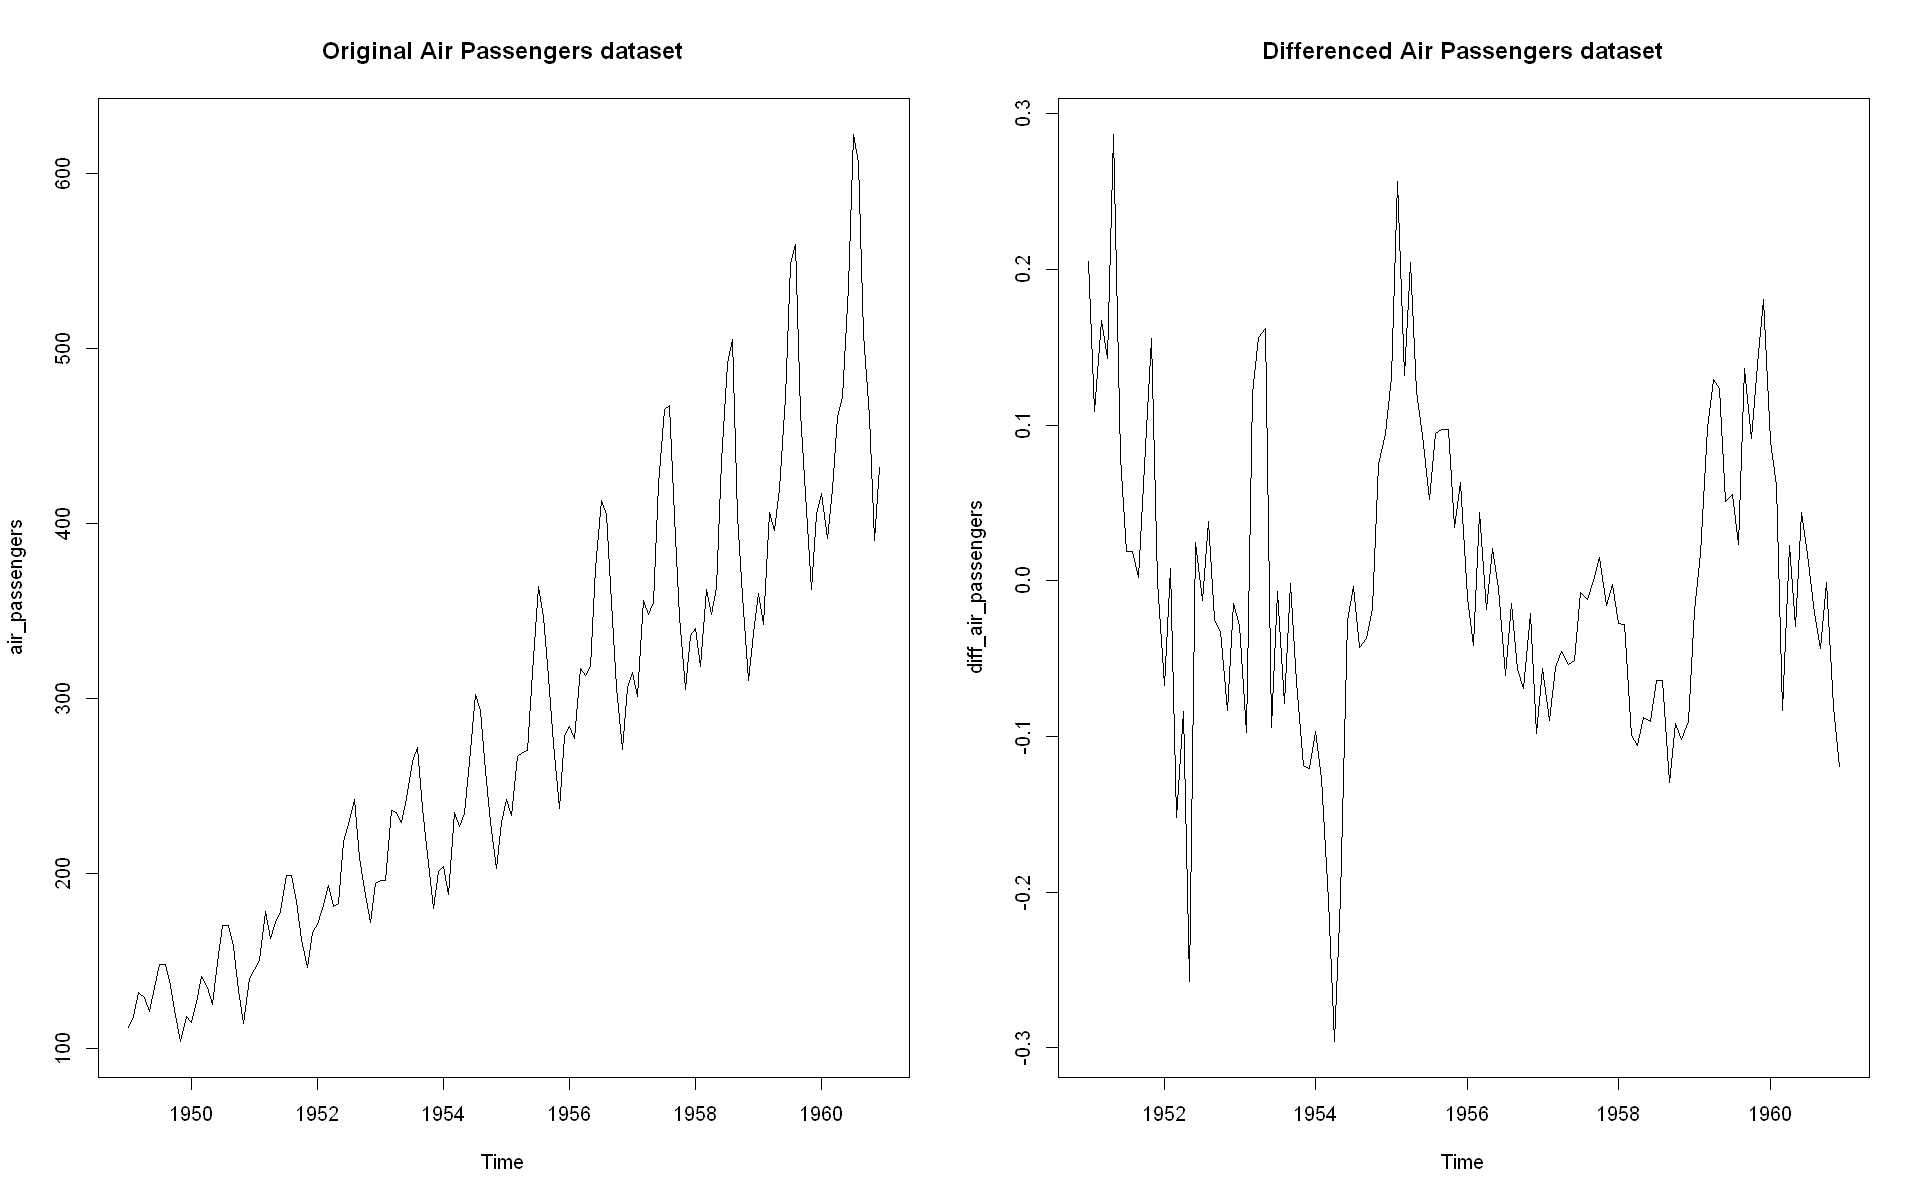

In [33]:
# Used for Jupyter notebook only
options(repr.plot.width=16, repr.plot.height=10)
# Show both side-by-side for comparison
opar <- par(no.readonly=TRUE)
par(mfrow=c(1,2))
plot(air_passengers, main = "Original Air Passengers dataset")
plot(diff_air_passengers, main = "Differenced Air Passengers dataset")
par(opar)

We can check whether the `diff()` function as now removed the stationarity using the `nsdiffs()` function again.

In [34]:
nsdiffs(diff_air_passengers)

[1] 0

We need to examine whether there's a trend in the data.

Recall the hypothesis tests:

The null hypothesis H0 : the time series is non stationary<br>
The alternative hypothesis HA : the time series is stationary<br>

In [35]:
adf.test(diff_air_passengers, alternative = "stationary")


	Augmented Dickey-Fuller Test

data:  diff_air_passengers
Dickey-Fuller = -3.5215, Lag order = 4, p-value = 0.04333
alternative hypothesis: stationary


And rerunning the `adf.test()` shows the p-value is in agreement with these findings (p < 0.05). This shows that we have strong evidence against the null hypothesis, so we reject the null hypothesis and choose the alternative hypothesis that the time series is stationary.

The `acf()` plot suggests this too.

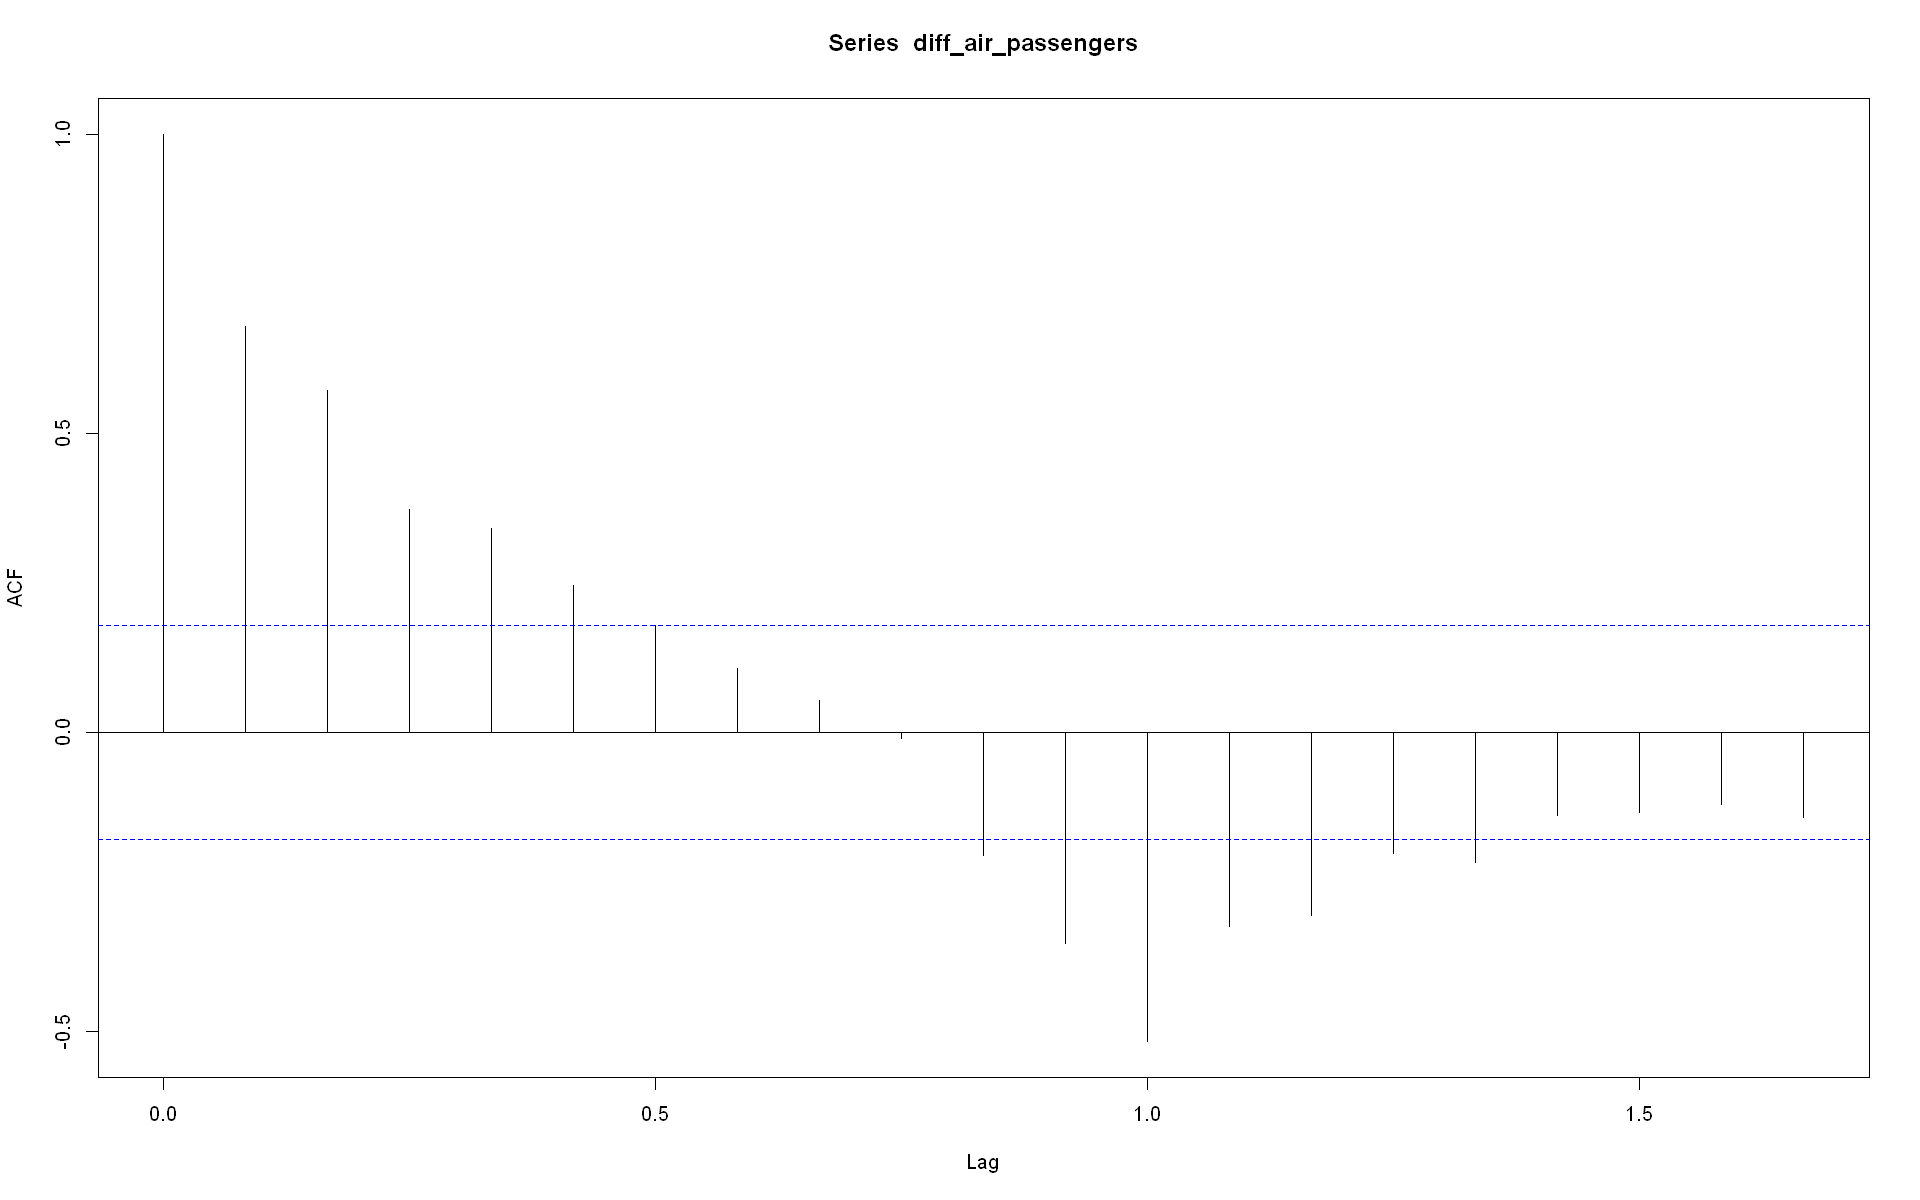

In [36]:
acf(diff_air_passengers)

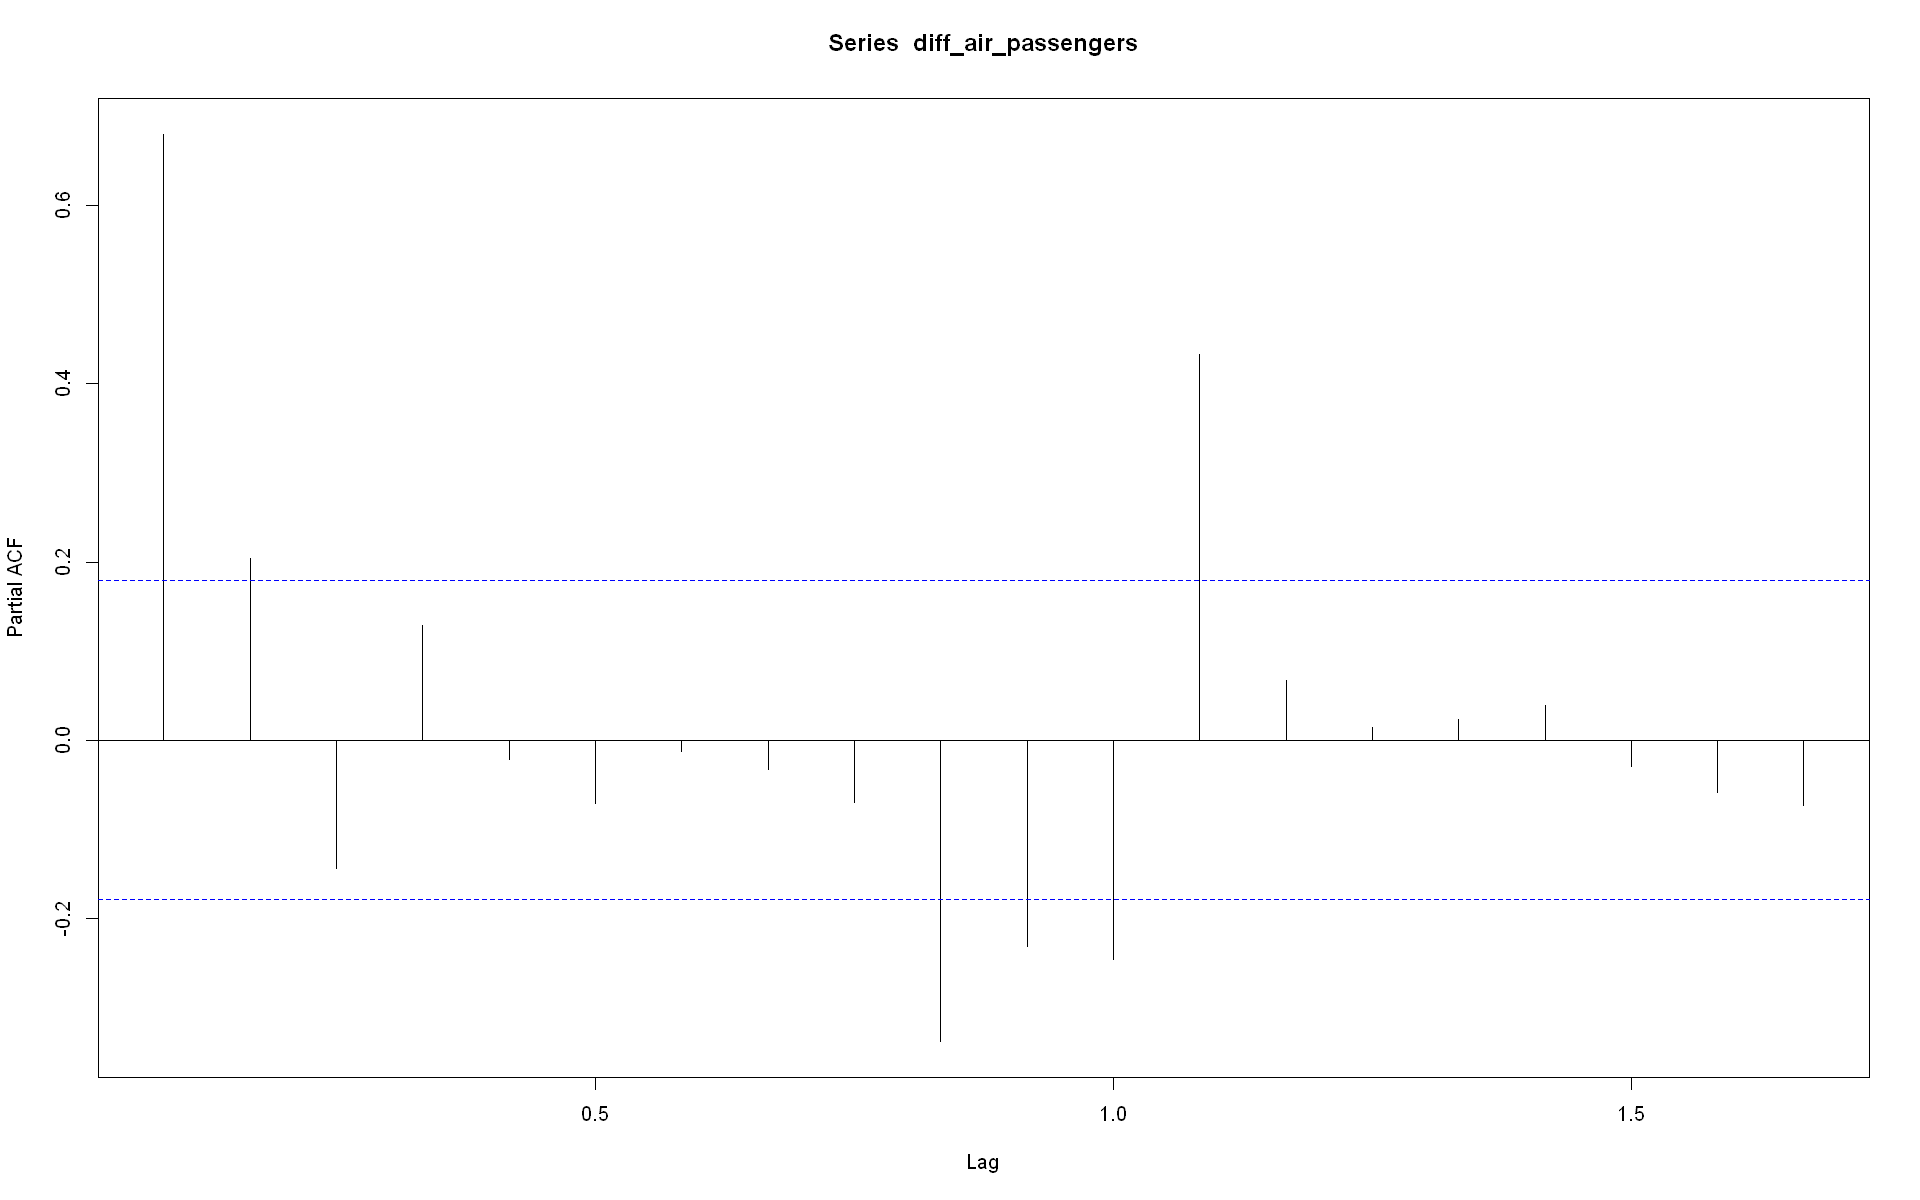

In [37]:
pacf(diff_air_passengers)

## Decompose( ) and STL(): functions

We can use a package to extract all the data using th `decompose()` and `stl()` functions in R.

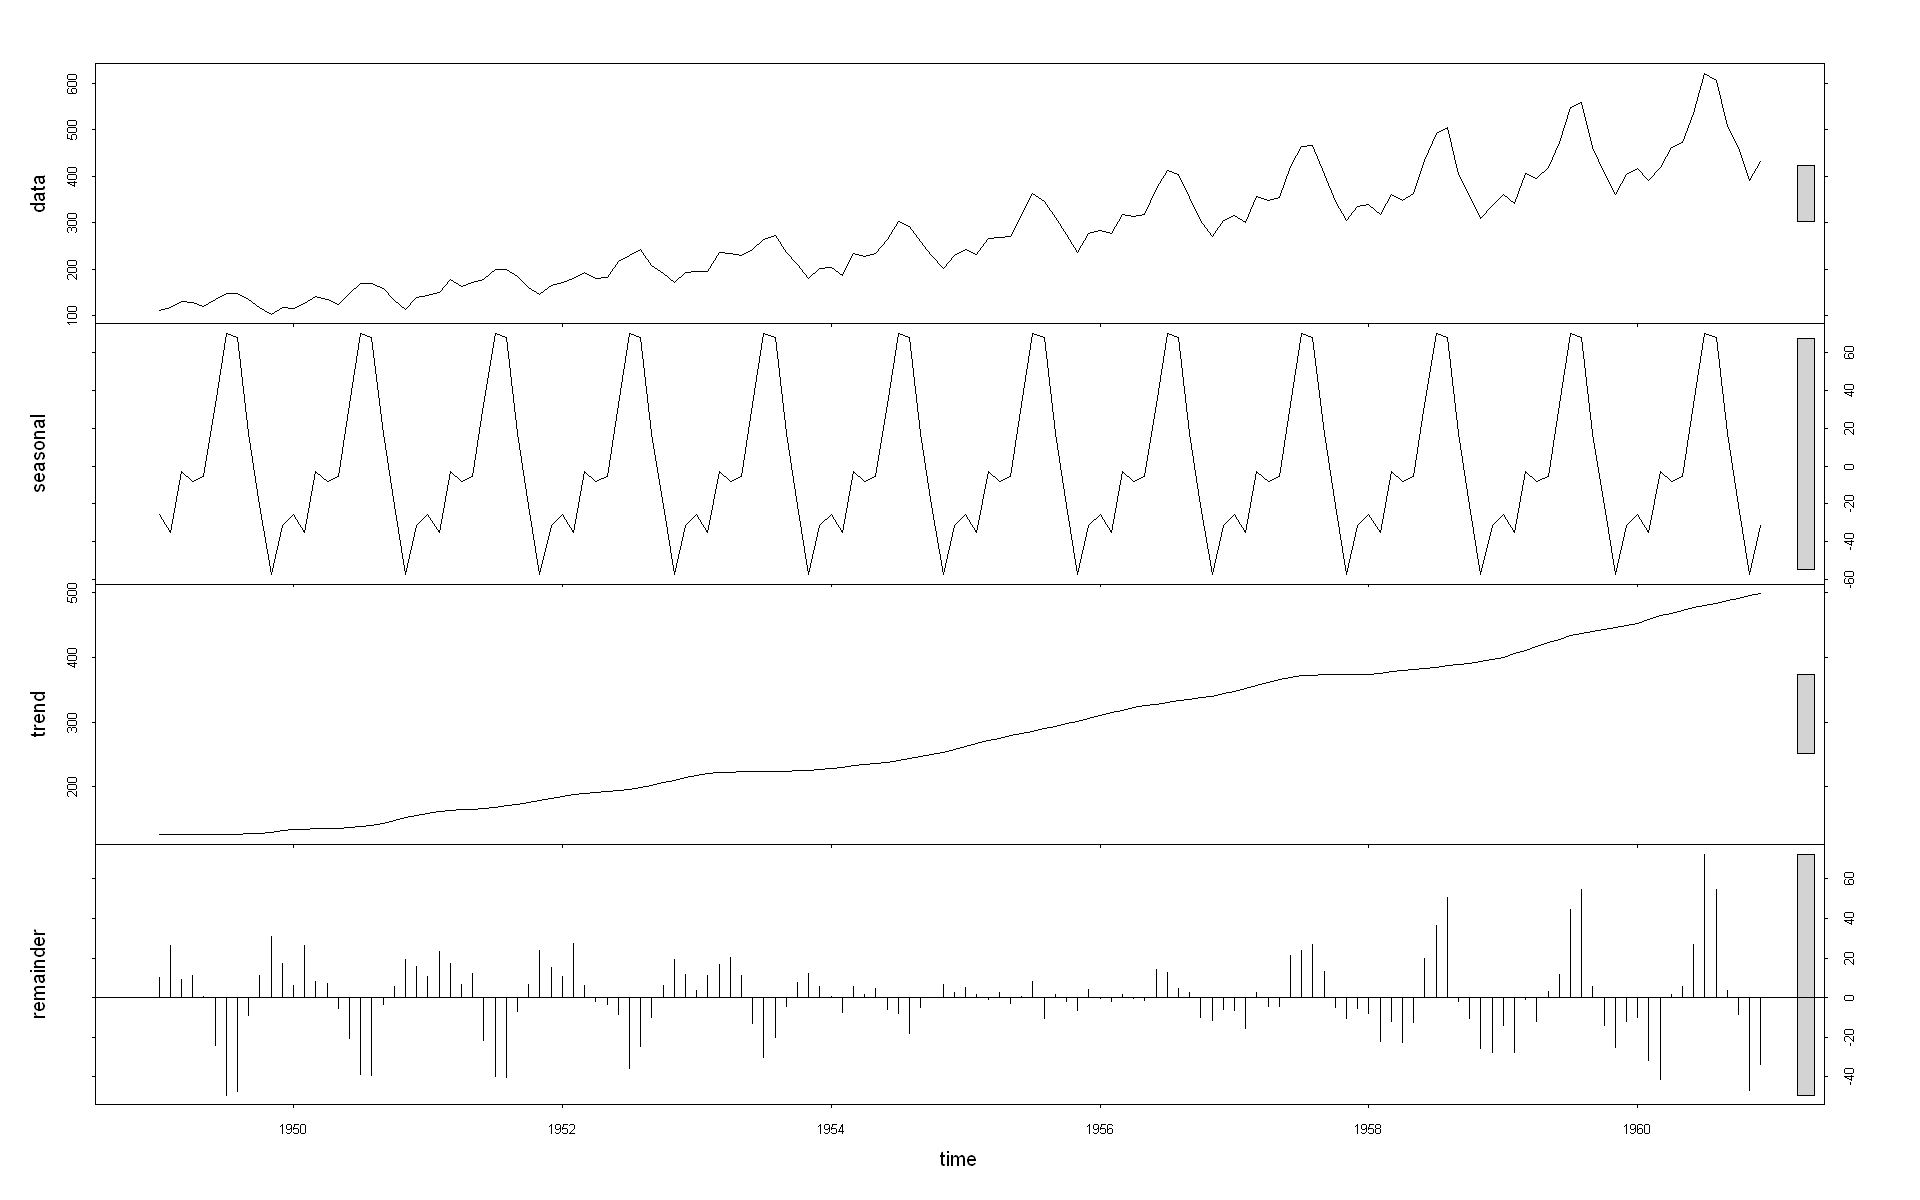

In [38]:
seasonal_decomposition <- stl(air_passengers, s.window="period")
plot(seasonal_decomposition)

## ARIMA models

Normally in an ARIMA model, we make use of either the AR term or the MA term. We use both of these terms only on rare occasions. We use the **ACF** plot to decide which one of these terms we would use for our time series.

If there is a Positive autocorrelation in the ACF plot at lag 1 then we use the AR model. If there is a Negative autocorrelation at lag 1 then we use the MA model.

In the `air passengers` dataset there is a negative correlation at lag 1, so we'll use the AR model. **Probably MA(1)**.

After plotting the ACF plot we move to Partial Autocorrelation Function plots (PACF). A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

If the PACF plot drops off at lag n, then use an AR(n) model and if the drop in PACF is more gradual then we use the MA term.

The PACF drops off at lag 0 - so we use the AR(1) model.

The value of **d** should be **1** as we've had to implement a lag of **1** to the data.

Therefore it seems that the best model should be either ARIMA(1,1,1).

We can evaluate the best model by evaluating the model with least AIC and BIC values.

## Seasonal ARIMA

As the name suggests, this model is used when the time series exhibits seasonality. This model is similar to ARIMA models, we just have to add in a few parameters to account for the seasons

We write SARIMA as

ARIMA(p,d,q)(P, D, Q)m,

    p — the number of autoregressive
    d — degree of differencing
    q — the number of moving average terms
    m — refers to the number of periods in each season
    (P, D, Q )— represents the (p,d,q) for the seasonal part of the time series

Seasonal differencing takes into account the seasons and differences the current value and it’s value in the previous season eg: Difference for the month may would be value in May 2018 — value in may 2017.

    In Purely seasonal AR model, ACF decays slowly while PACF cuts off to zero
    AR models are used when seasonal auto-correlation is positive
    In Purely seasonal MA model, ACF cuts off to zero and vice versa
    MA models are used when seasonal auto-correlation is negative
    
The seasonal part of the model consists of terms that are similar to the non-seasonal components of the model, but involve backshifts of the seasonal period. 

The seasonal part of an AR or MA model will be seen in the seasonal lags of the PACF and ACF.<br> 

For example, an **ARIMA(0,0,0)(0,0,1)12** model will show:

 - a spike at lag 12 in the ACF but no other significant spikes;
 - exponential decay in the seasonal lags of the PACF (i.e., at lags 12, 24, 36, …).

Similarly, an **ARIMA(0,0,0)(1,0,0)12** model will show:

 - exponential decay in the seasonal lags of the ACF;
 - a single significant spike at lag 12 in the PACF.

In considering the appropriate seasonal orders for a seasonal ARIMA model, restrict attention to the seasonal lags. 

## Fitting an ARIMA model

Lets build a seasonal ARIMA model.

In [39]:
fit <- arima(air_passengers, 
             c(1,1,1), 
             seasonal = list(order = c(1,1,1), 
                             period = 12))
fit


Call:
arima(x = air_passengers, order = c(1, 1, 1), seasonal = list(order = c(1, 1, 
    1), period = 12))

Coefficients:
          ar1      ma1     sar1    sma1
      -0.1387  -0.2027  -0.9228  0.8329
s.e.   0.5860   0.6123   0.2386  0.3519

sigma^2 estimated as 130.8:  log likelihood = -506.15,  aic = 1022.3

## Generate forecasts

Finally we can plot a forecast of the time series using the forecast function, again from the forecast R package, with a 95% confidence interval where h is the forecast horizon periods in months.

In [40]:
prediction <- predict(fit, n.ahead = 3 * 12)
prediction

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1961,449.2223,424.3072,459.0023,497.7220,509.7462,568.1989,655.7364,641.1725,546.3741,496.7500,427.6964,471.2915
1962,484.9196,458.8334,487.3741,529.1175,540.1970,602.8458,689.8873,673.9982,576.2455,529.0428,458.1931,500.3163
1963,517.2610,492.2555,526.4753,565.4285,577.3797,636.1565,723.6557,708.9894,613.9629,564.5258,495.3334,538.8149
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1961,11.44533,13.70365,15.90753,17.80729,19.52733,21.10712,22.57670,23.95629,25.26065,26.50089,27.68562,28.82174
1962,34.20466,37.29548,40.33419,43.13519,45.76825,48.25744,50.62444,52.88560,55.05397,57.14011,59.15273,61.09909
1963,66.66411,70.44960,74.20919,77.76493,81.16801,84.43365,87.57766,90.61263,93.54920,96.39635,99.16178,101.85218


In [41]:
forecast_air_passengers <- forecast(fit, level = c(95), h = 36)
forecast_air_passengers

         Point Forecast    Lo 95    Hi 95
Jan 1961       449.2223 426.7899 471.6547
Feb 1961       424.3072 397.4485 451.1658
Mar 1961       459.0023 427.8241 490.1805
Apr 1961       497.7220 462.8204 532.6237
May 1961       509.7462 471.4733 548.0190
Jun 1961       568.1989 526.8297 609.5681
Jul 1961       655.7364 611.4868 699.9859
Aug 1961       641.1725 594.2190 688.1259
Sep 1961       546.3741 496.8642 595.8841
Oct 1961       496.7500 444.8092 548.6908
Nov 1961       427.6964 373.4335 481.9592
Dec 1961       471.2915 414.8019 527.7811
Jan 1962       484.9196 417.8797 551.9595
Feb 1962       458.8334 385.7356 531.9312
Mar 1962       487.3741 408.3205 566.4277
Apr 1962       529.1175 444.5741 613.6609
May 1962       540.1970 450.4929 629.9012
Jun 1962       602.8458 508.2629 697.4286
Jul 1962       689.8873 590.6652 789.1094
Aug 1962       673.9982 570.3443 777.6521
Sep 1962       576.2455 468.3417 684.1493
Oct 1962       529.0428 417.0502 641.0354
Nov 1962       458.1931 342.2559 5

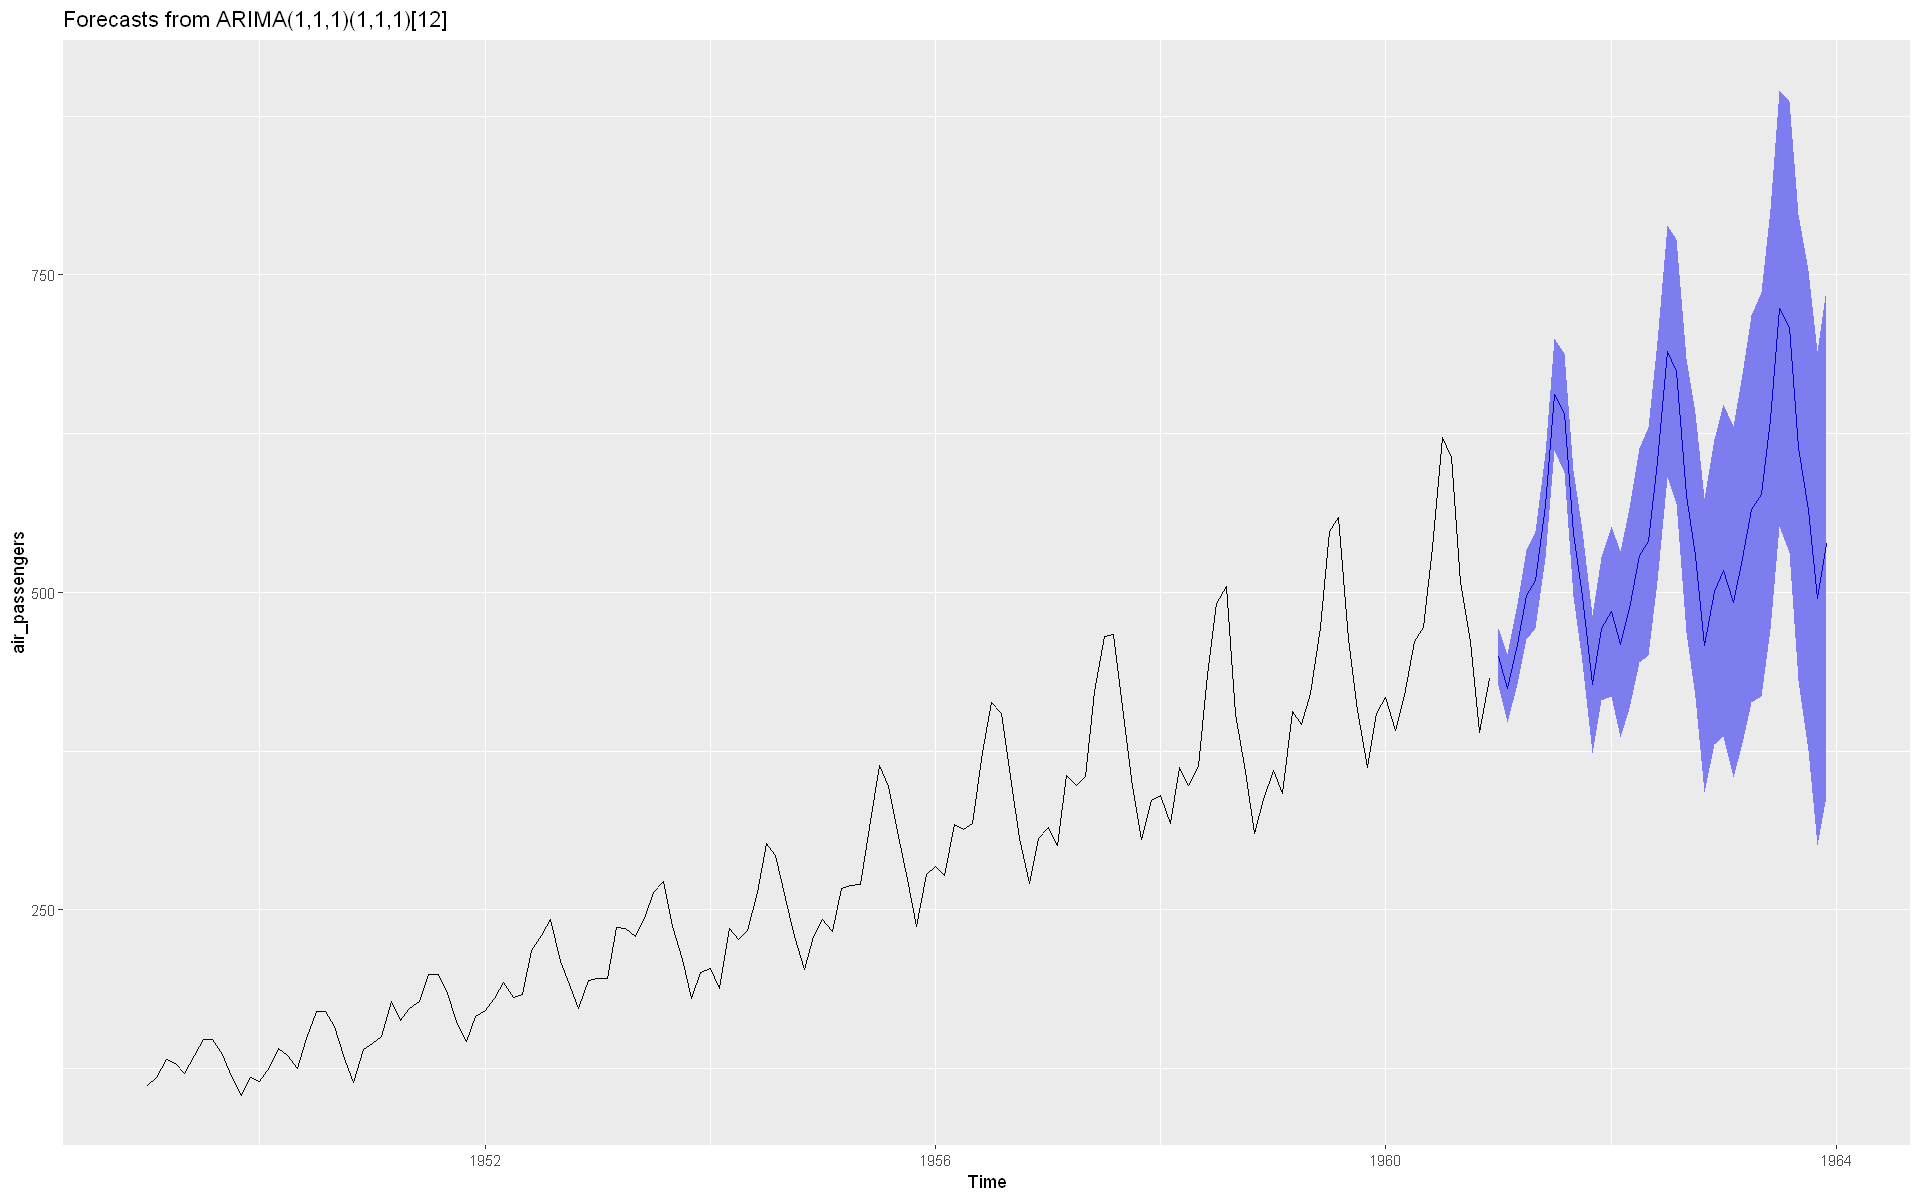

In [42]:
autoplot(forecast_air_passengers)

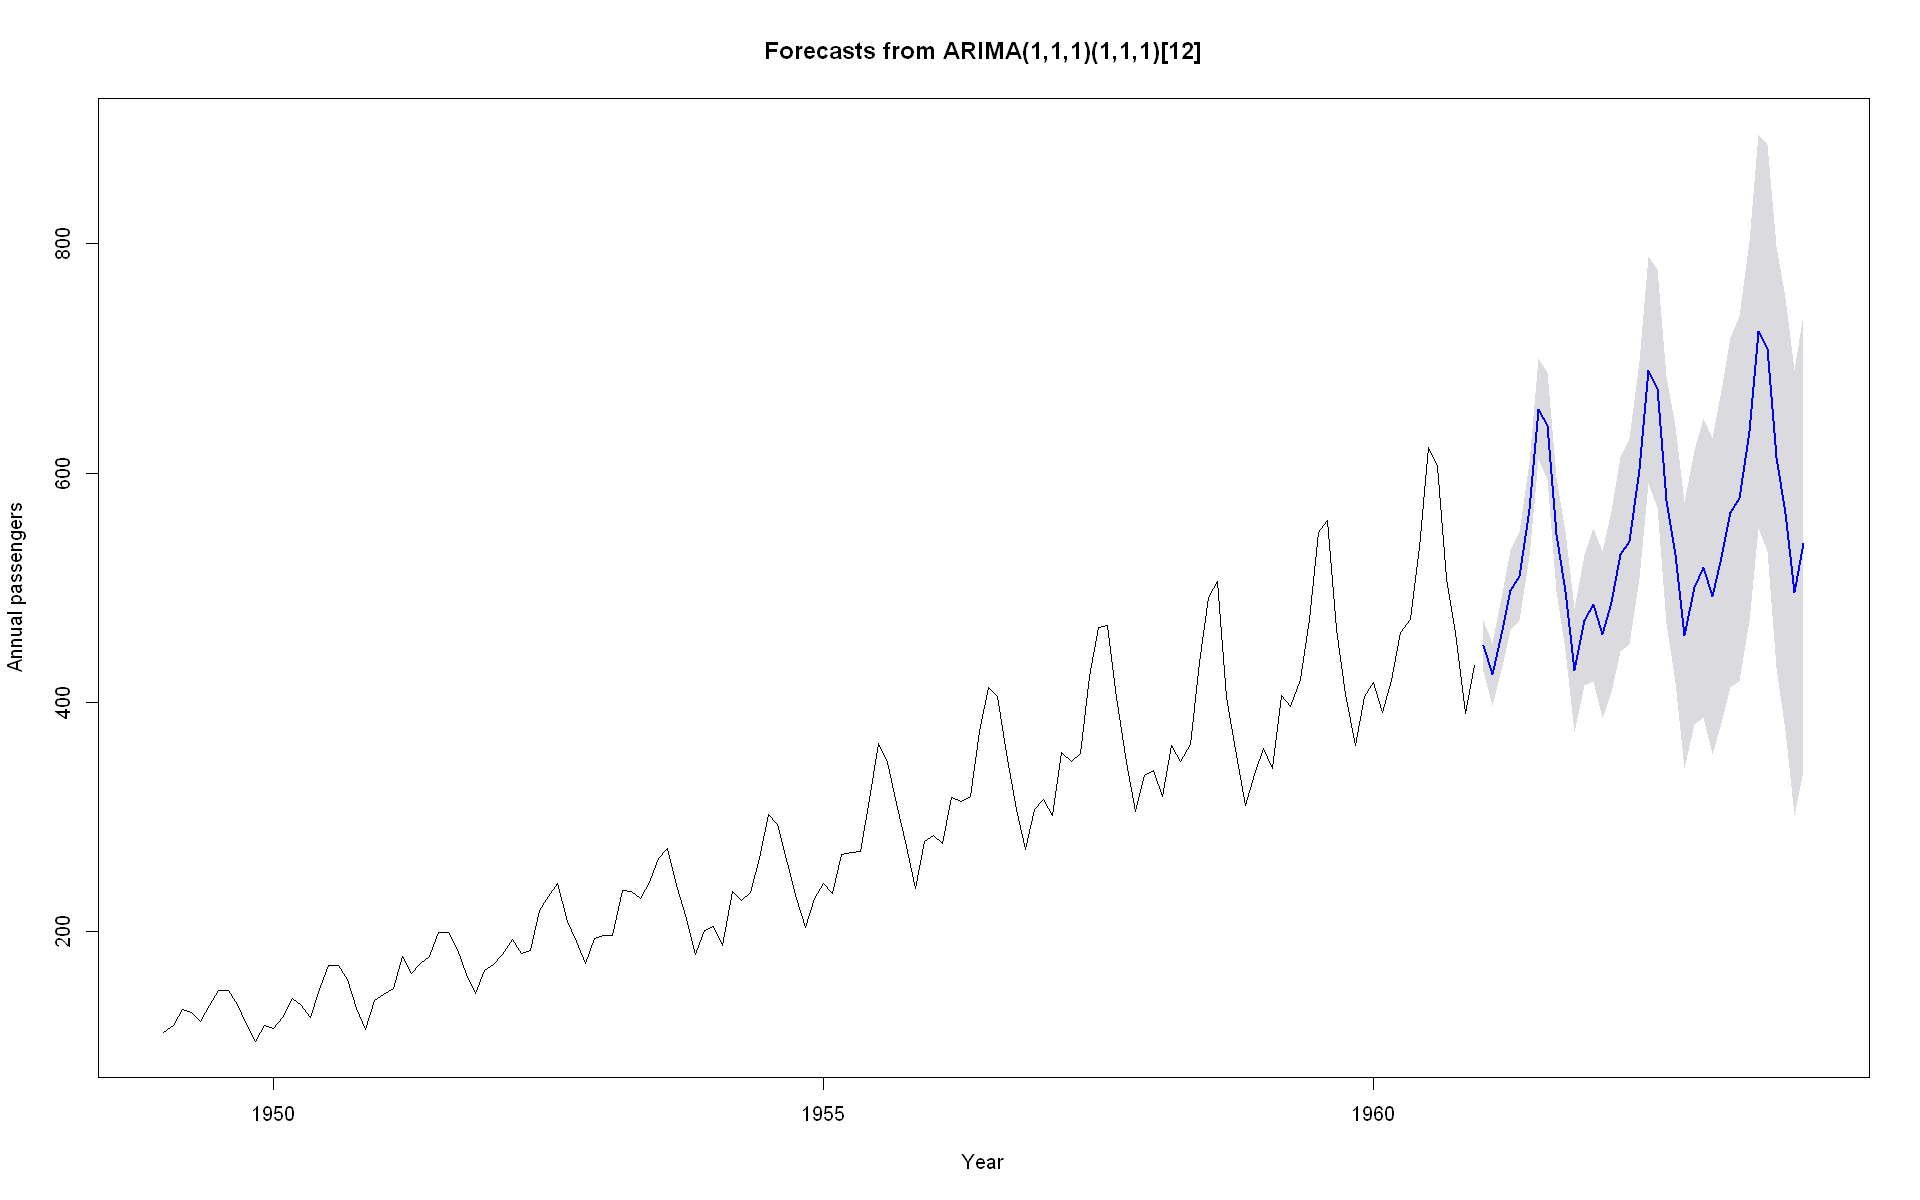

In [43]:
plot(forecast(forecast_air_passengers, 3), xlab = "Year", ylab = "Annual passengers")

In [44]:
auto_arima_model <- auto.arima(air_passengers)
auto_arima_model

Series: air_passengers 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 estimated as 132.3:  log likelihood=-504.92
AIC=1017.85   AICc=1018.17   BIC=1029.35

In [45]:
accuracy(auto_arima_model)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.3423,10.84619,7.86754,0.420698,2.800458,0.245628,-0.00124847


In [46]:
accuracy(fit)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.3152762,10.91023,8.003276,0.04379133,2.848878,0.3094831,0.0004688507


## Comparisons

auto_arima AIC = 1017.85<br>
fit AIC = 1022.3<br>

Auto_arima coefficient for the moving averages is -0.9819<br>
fit coefficient for the moving averages is -0.2027 <br>

Auto_arima MAPE = 2.800458<br>
fit MAPE = 2.848878<br>

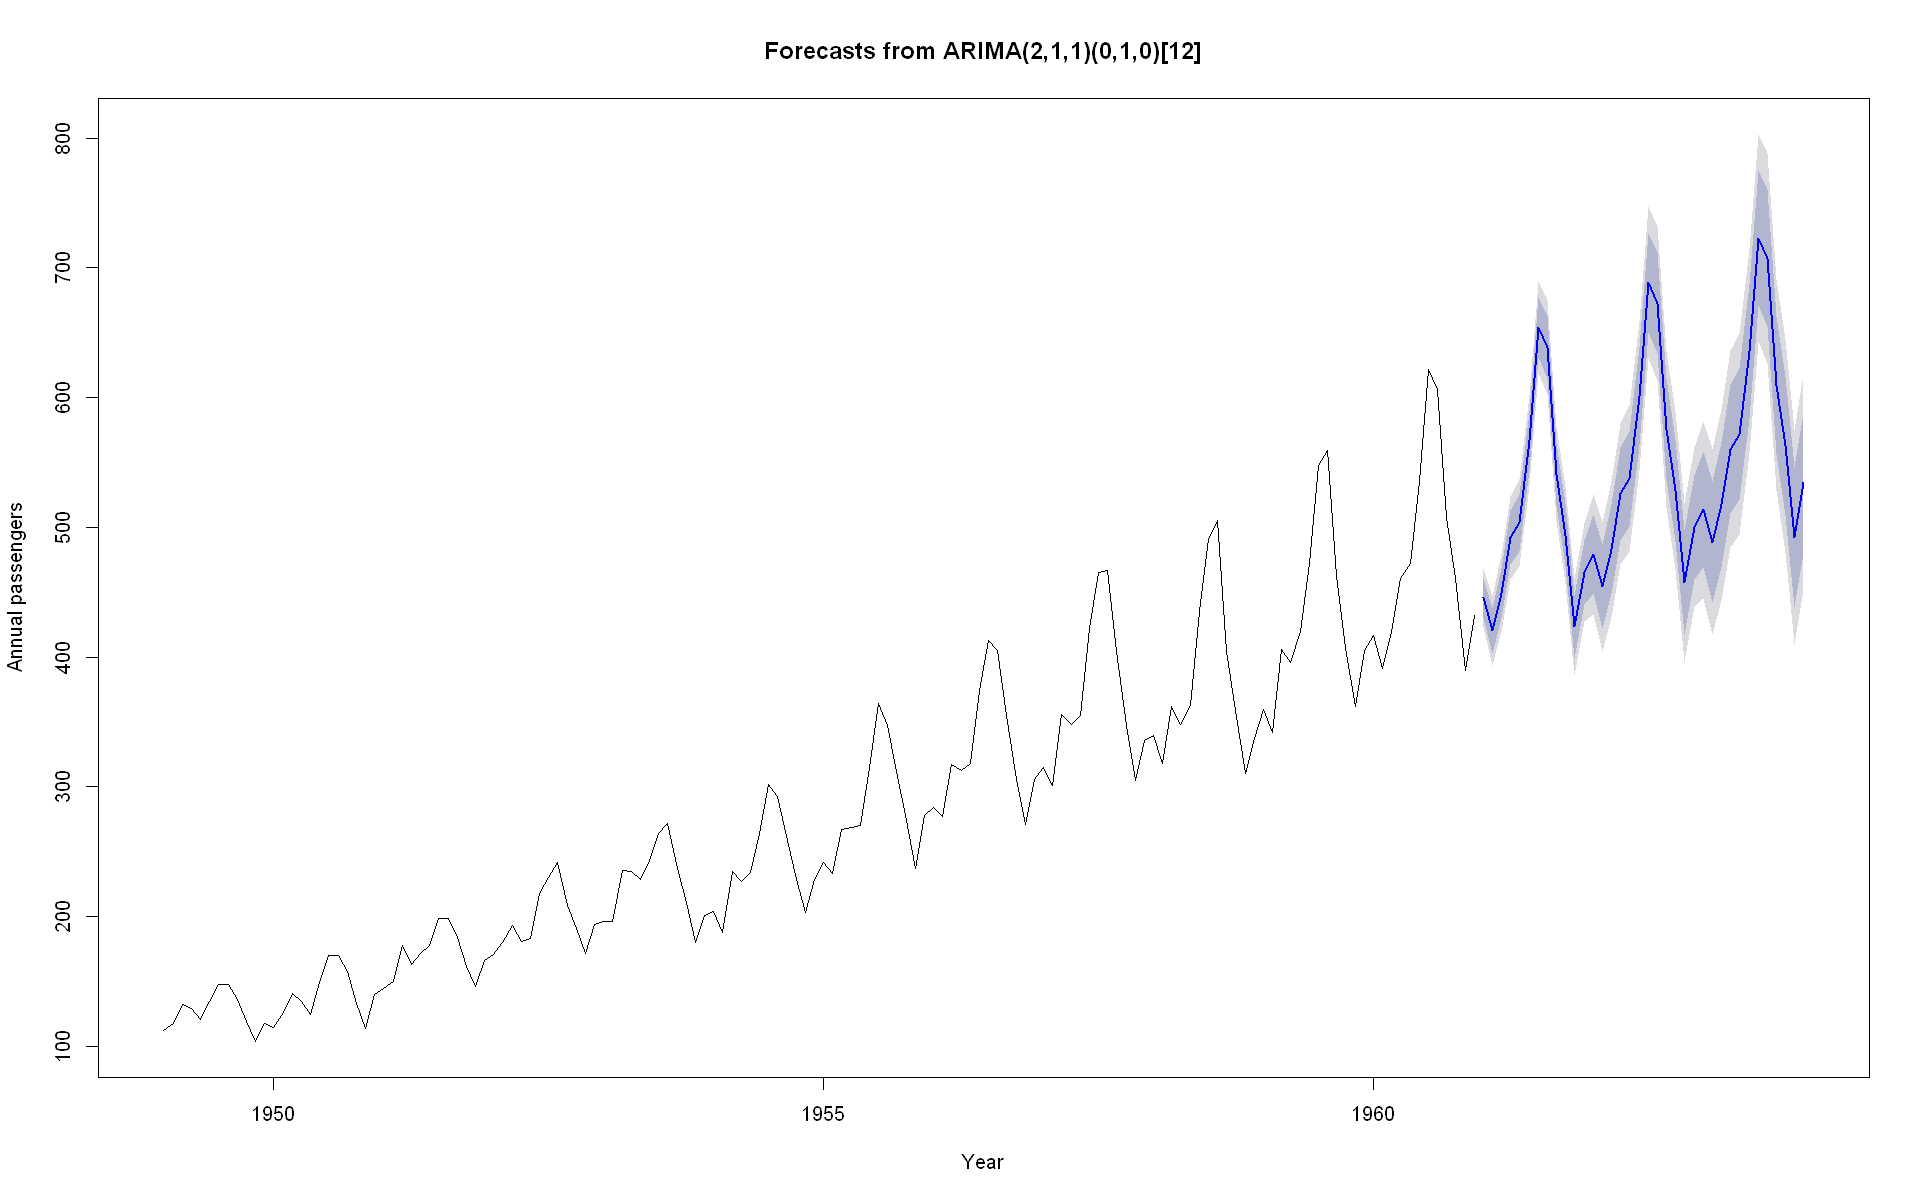

In [47]:
plot(forecast(auto_arima_model, 3 * 12), xlab = "Year", ylab = "Annual passengers")

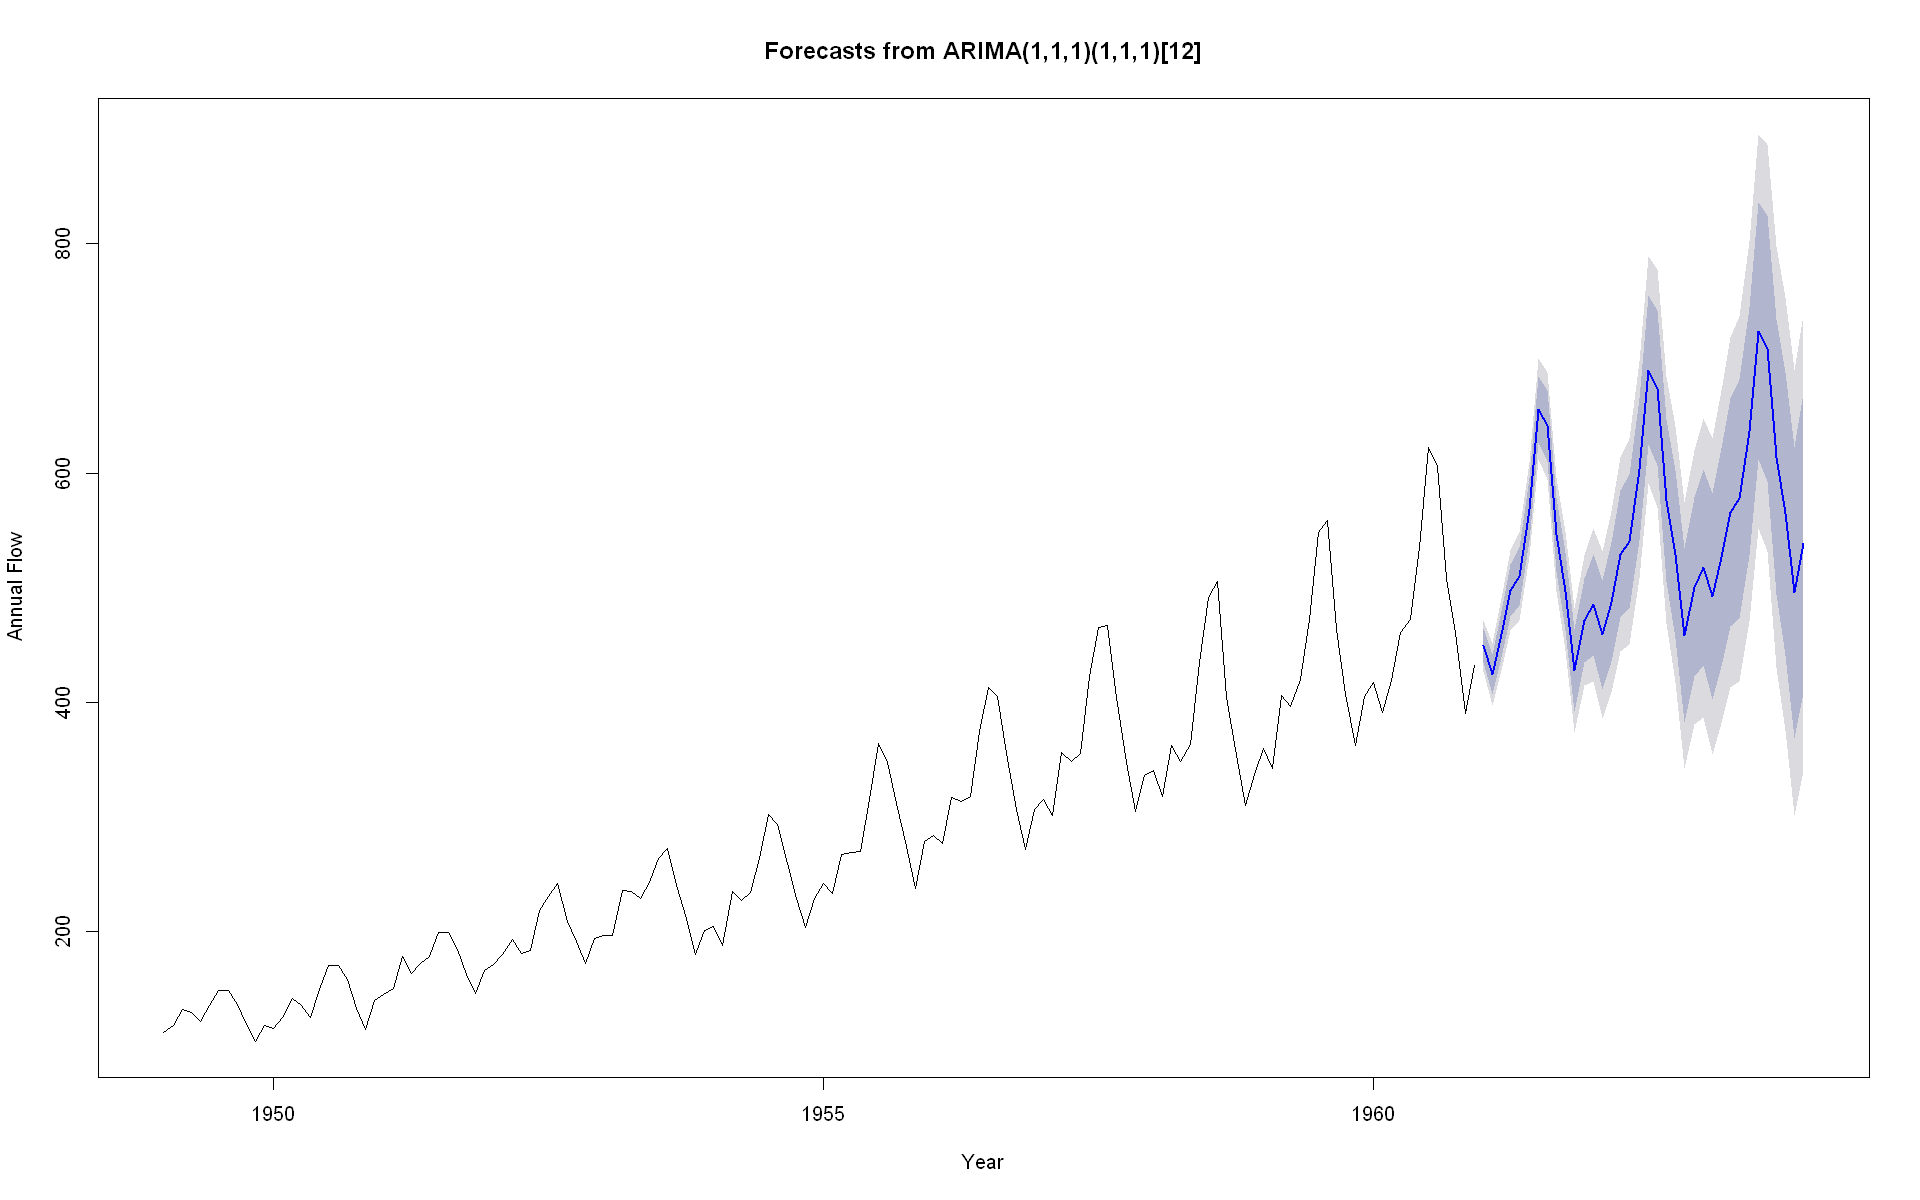

In [48]:
plot(forecast(fit, 3 * 12), xlab = "Year", ylab = "Annual Flow")

## Evaluating the models

If the model is appropriate, the residuals should be normally distributed with mean zero, and the autocorrelations should be zero for every possible lag.
In other words, the residuals should be normally and independently distributed (no relationship between them). 

We can examine the residuals using the Q-Q plot function.

The results aren’t significant, suggesting the autocorrelations don’t differ from zero.<br>

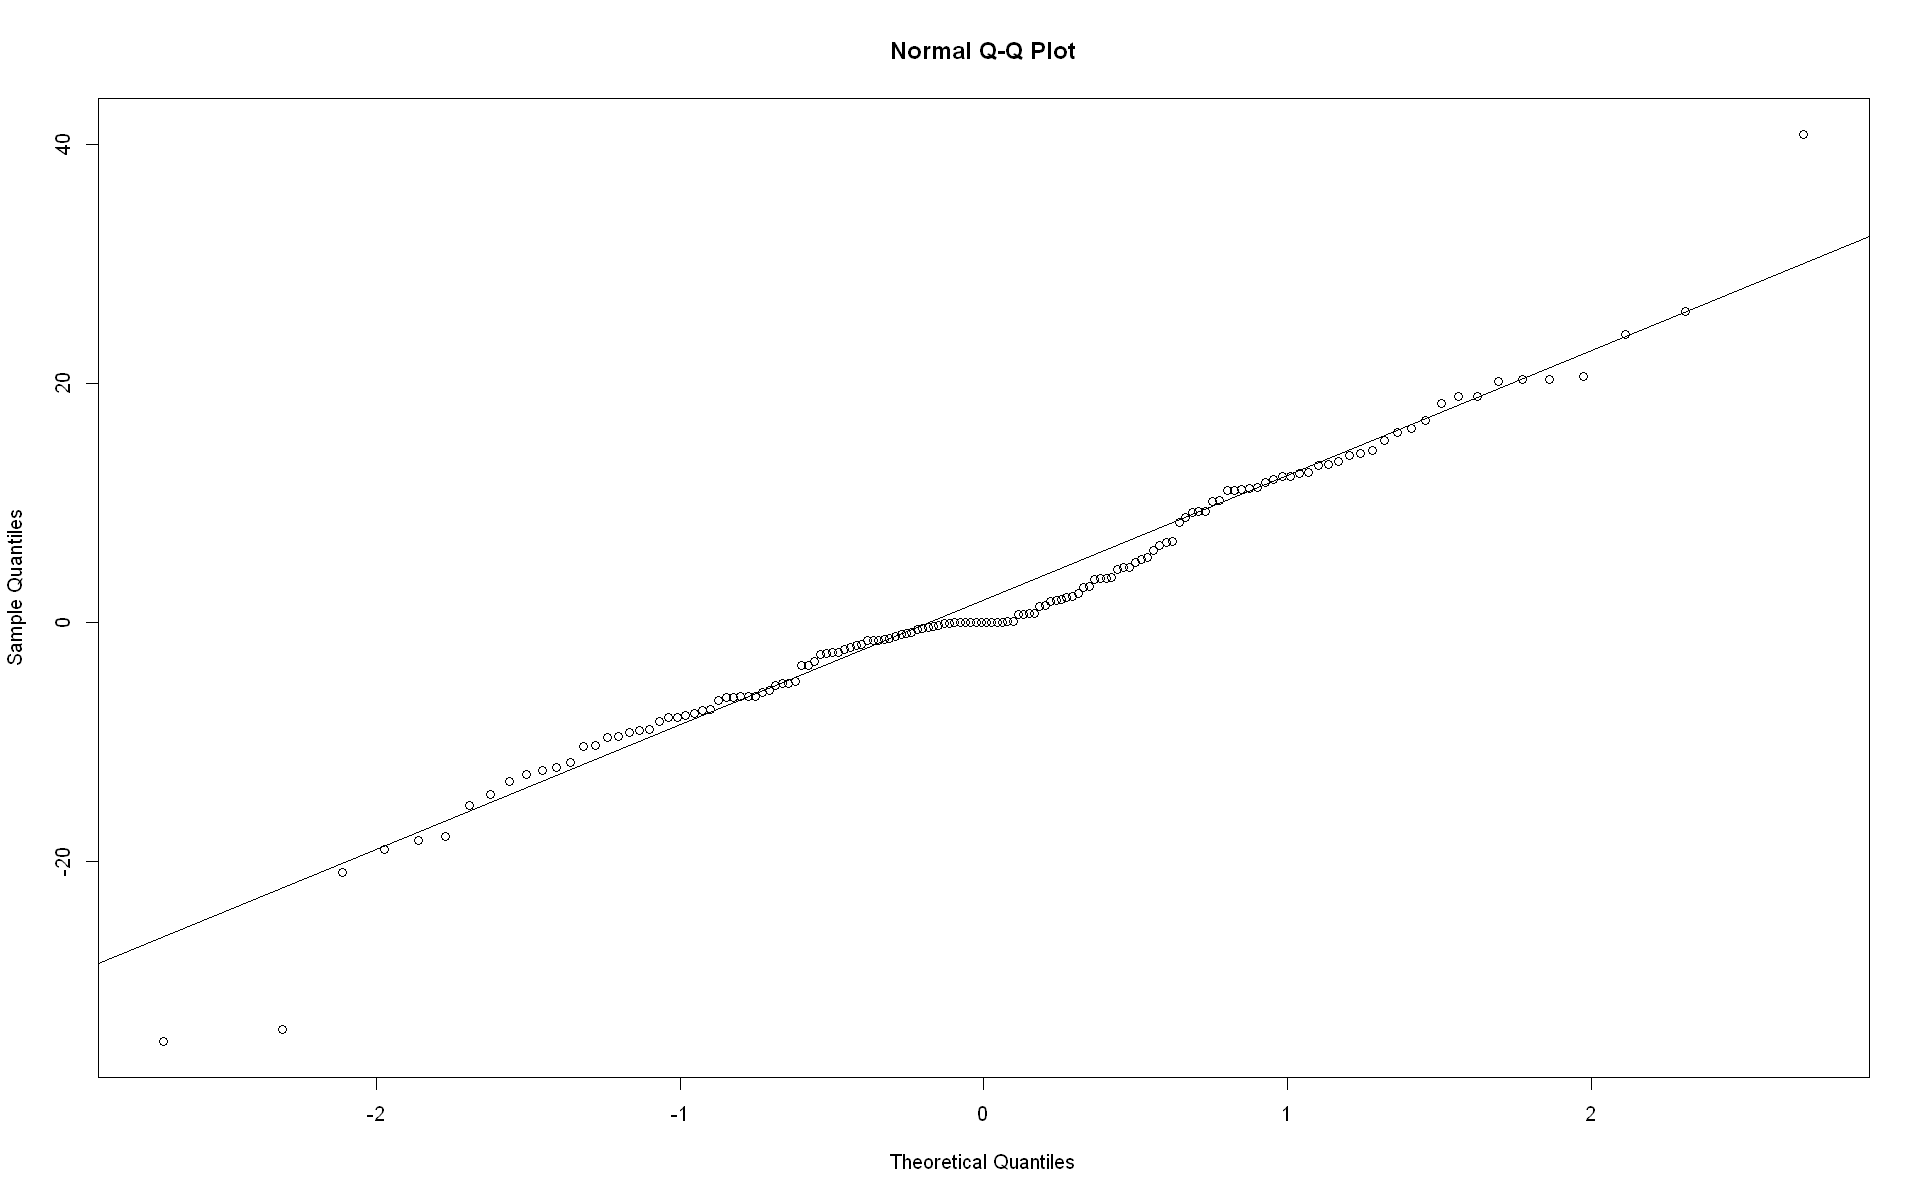

In [49]:
qqnorm(auto_arima_model$residuals)
qqline(auto_arima_model$residuals)

The `Box.test()` function tests that the autocorrelations are all zero.

H0 = the autocorrelations are all zero. 

In this example, p > 0.05 so fail to reject the null hypothesis 
This ARIMA model appears to fit the data well

In [50]:
Box.test(auto_arima_model$residuals, type = "Ljung-Box")


	Box-Ljung test

data:  auto_arima_model$residuals
X-squared = 0.00022916, df = 1, p-value = 0.9879


We can apply the same tests to the manually selected model.

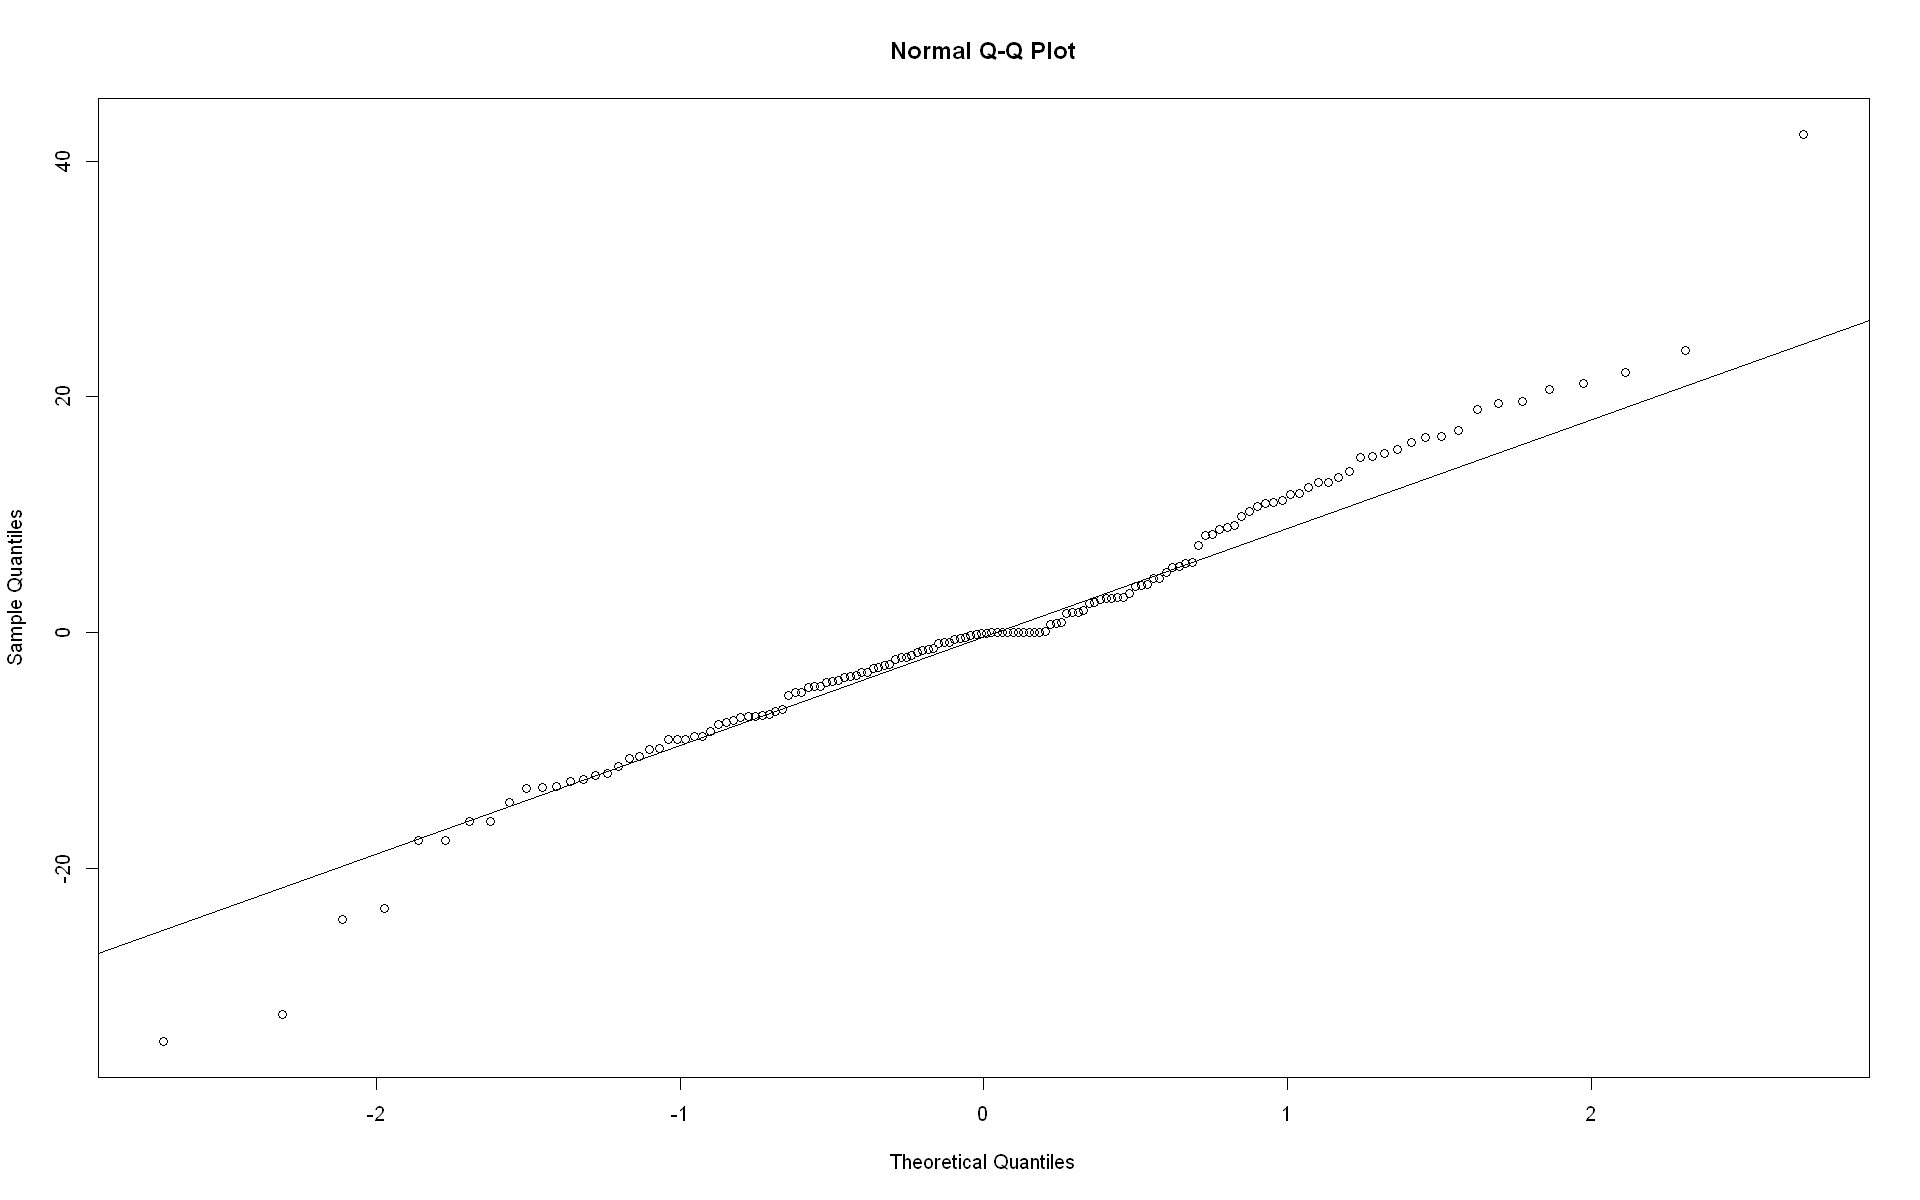

In [51]:
qqnorm(fit$residuals)
qqline(fit$residuals)

In [52]:
Box.test(fit$residuals, type = "Ljung-Box")


	Box-Ljung test

data:  fit$residuals
X-squared = 3.2318e-05, df = 1, p-value = 0.9955


The fit p value is slightly better than the auto ARIMA p value (p-value = 0.9955 versus p-value = 0.9879).

## Choosing training and testing data

We can also assess the predicted values versus actual values from the dataset. We need to split the data into a train/test split.

The method used to do this is similar to that used with ML models, although the data is selected according to frequency and not a percentage value.

In [53]:
air_passengers_train <- window(x = air_passengers, start=c(1949), end=c(1957, 12))
air_passengers_test <- window(x = air_passengers, start=c(1958))

In [54]:
air_passengers_train

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [55]:
air_passengers_test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1958,340,318,362,348,363,435,491,505,404,359,310,337
1959,360,342,406,396,420,472,548,559,463,407,362,405
1960,417,391,419,461,472,535,622,606,508,461,390,432


In [56]:
fit <- arima(air_passengers_train, 
             c(1,1,1), 
             seasonal = list(order = c(1,1,1), 
                             period = 12))
fit


Call:
arima(x = air_passengers_train, order = c(1, 1, 1), seasonal = list(order = c(1, 
    1, 1), period = 12))

Coefficients:
          ar1     ma1    sar1    sma1
      -0.5904  0.3846  -0.382  0.2487
s.e.   0.2690  0.3049   0.513  0.5373

sigma^2 estimated as 89.76:  log likelihood = -348.58,  aic = 707.16

In [57]:
auto_arima_model <- auto.arima(air_passengers_train)
auto_arima_model

Series: air_passengers_train 
ARIMA(1,1,0)(0,1,0)[12] 

Coefficients:
          ar1
      -0.2411
s.e.   0.0992

sigma^2 estimated as 93.74:  log likelihood=-350
AIC=704   AICc=704.13   BIC=709.11

In [58]:
predict_auto_ARIMA <- forecast(auto_arima_model, 3 * 12)
predict_auto_ARIMA

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1958       345.9645 333.5565 358.3725 326.9882 364.9408
Feb 1958       331.7319 316.1557 347.3082 307.9101 355.5538
Mar 1958       386.7880 368.2034 405.3727 358.3653 415.2108
Apr 1958       378.7745 357.6875 399.8615 346.5247 411.0243
May 1958       385.7778 362.4374 409.1181 350.0818 421.4737
Jun 1958       452.7770 427.3865 478.1675 413.9455 491.6084
Jul 1958       495.7772 468.4892 523.0651 454.0438 537.5105
Aug 1958       497.7771 468.7155 526.8388 453.3312 542.2231
Sep 1958       434.7771 404.0440 465.5103 387.7748 481.7794
Oct 1958       377.7771 345.4588 410.0954 328.3505 427.2037
Nov 1958       335.7771 301.9478 369.6064 284.0397 387.5145
Dec 1958       366.7771 331.5015 402.0527 312.8278 420.7265
Jan 1959       376.7416 334.9521 418.5311 312.8301 440.6532
Feb 1959       362.5091 316.4304 408.5877 292.0378 432.9803
Mar 1959       417.5651 367.2794 467.8509 340.6597 494.4705
Apr 1959       409.5516 355.4490 463.654

In [59]:
precict_manual_ARIMA <- forecast(fit, 3 * 12)
precict_manual_ARIMA

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1958       344.9231 332.7818 357.0645 326.3546 363.4917
Feb 1958       331.4629 315.9584 346.9674 307.7508 355.1750
Mar 1958       384.9889 365.9102 404.0675 355.8106 414.1671
Apr 1958       377.0908 355.4347 398.7470 343.9706 410.2111
May 1958       384.1126 359.9302 408.2950 347.1288 421.0964
Jun 1958       449.8897 423.5430 476.2363 409.5959 490.1834
Jul 1958       491.9903 463.5776 520.4031 448.5368 535.4439
Aug 1958       492.9745 462.6730 523.2760 446.6323 539.3167
Sep 1958       431.2286 399.1287 463.3285 382.1361 480.3211
Oct 1958       374.9870 341.1959 408.7781 323.3079 426.6660
Nov 1958       334.0962 298.6880 369.5043 279.9441 388.2483
Dec 1958       365.3162 328.3654 402.2670 308.8048 421.8276
Jan 1959       374.4275 331.8788 416.9763 309.3548 439.5003
Feb 1959       360.6673 314.0994 407.2353 289.4478 431.8869
Mar 1959       414.8117 364.0486 465.5748 337.1763 492.4472
Apr 1959       406.8421 352.4802 461.203

In [60]:
# make actuals_predicted dataframe
# for auto ARIMA
actuals_predictions <- data.frame(cbind(actuals = air_passengers_test, predicted = predict_auto_ARIMA))
head(actuals_predictions)

,actuals,predicted.Point.Forecast,predicted.Lo.80,predicted.Hi.80,predicted.Lo.95,predicted.Hi.95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,340,345.9645,333.5565,358.3725,326.9882,364.9408
2,318,331.7319,316.1557,347.3082,307.9101,355.5538
3,362,386.7880,368.2034,405.3727,358.3653,415.2108
4,348,378.7745,357.6875,399.8615,346.5247,411.0243
5,363,385.7778,362.4374,409.1181,350.0818,421.4737
6,435,452.7770,427.3865,478.1675,413.9455,491.6084


In [61]:
correlation_accuracy <- cor(actuals_predictions)
correlation_accuracy

,actuals,predicted.Point.Forecast,predicted.Lo.80,predicted.Hi.80,predicted.Lo.95,predicted.Hi.95
actuals,1.0000000,0.9804770,0.7351465,0.9445094,0.4937979,0.9021220
predicted.Point.Forecast,0.9804770,1.0000000,0.8101942,0.9238760,0.5870616,0.8691093
predicted.Lo.80,0.7351465,0.8101942,1.0000000,0.5241998,0.9501564,0.4142201
predicted.Hi.80,0.9445094,0.9238760,0.5241998,1.0000000,0.2325669,0.9922364
predicted.Lo.95,0.4937979,0.5870616,0.9501564,0.2325669,1.0000000,0.1098049
predicted.Hi.95,0.9021220,0.8691093,0.4142201,0.9922364,0.1098049,1.0000000


This process can now be repeated for the manual method.